# ***Проект интернет-магазин***

# ***Описание проекта***

***Контекст проекта:***

Интернет-магазин продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Поручено разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

***Цель проекта:***

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

***План:***

***Шаг 1.*** Загрузка данных:
- 1.1 Загрузить данные. 
- 1.2 Проверить, что данные в таблицах соответствуют описанию. Исследованием и объединением данных вы займётесь позже.

***Шаг 2.*** Предобработка данных:
- Провести необходимую предобработку данных. Названия столбцов можно оставить кириллическими.

***Шаг 3.*** Исследовательский анализ данных:
- Провести исследовательский анализ данных из каждой таблицы. 
- Отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. - Оформить выводы по результатам шага.

***Шаг 4.*** Объединение таблиц:
- 4.1 Объединить таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании не понадобятся. 
- 4.2 Учесть, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделать отдельный столбец для каждого периода.

***Шаг 5.*** Корреляционный анализ:
- Провести корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. 
- Сделать выводы о мультиколлинеарности и при необходимости устраните её.

***Шаг 6.*** Использование пайплайнов:
- 6.1 Во время подготовки данных использовать ColumnTransformer. Количественные и категориальные признаки обработать в пайплайне раздельно. Для кодирования категориальных признаков использовать как минимум два кодировщика, для масштабирования количественных как минимум два скейлера.
- 6.2 Обучить четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подобрать как минимум один гиперпараметр. Выбрать подходящую для задачи метрику, аргументировать свой выбор. Использовать эту метрику при подборе гиперпараметров.
- 6.3 Выбрать лучшую модель, используя заданную метрику. Для этого применить одну из стратегий:
    - использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
    - использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.
    
***Шаг 7.*** Анализ важности признаков:
- 7.1 Оценить важность признаков для лучшей модели и построить график важности с помощью метода SHAP. 
- 7.2 Сделать выводы о значимости признаков:
    - какие признаки мало значимы для модели;
    - какие признаки сильнее всего влияют на целевой признак;
    - как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

***Шаг 8.*** Сегментация покупателей:
- 8.1 Выполнить сегментацию покупателей. Использовать результаты моделирования и данные о прибыльности покупателей.
- 8.2 Выбрать группу покупателей и предложить, как увеличить её покупательскую активность: 
    - Провести графическое и аналитическое исследование группы покупателей.
    - Сделать предложения по работе с сегментом для увеличения покупательской активности.
- 8.3 Сделать выводы о сегментах:
    - какой сегмент отобран для дополнительного исследования,
    - какие предложения сделаны и почему.
    
***Шаг 9.*** Общий вывод:
- Сделать общий вывод:
    - описать задачу;
    - описать исходные данные и проведённую предобработку;
    - написать, что было сделано для поиска лучшей модели;
    - указать лучшую модель;
    - добавить выводы и дополнительные предложения для выбранного сегмента покупателей.

## Загрузка данных:

***Необходимые импорты***

In [1]:
!pip install shap

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from warnings import simplefilter
from sklearn.preprocessing import LabelEncoder
import shap
from scipy.stats import uniform, randint

***Загрузка данных***

In [3]:
market_file_data = pd.read_csv('/datasets/market_file.csv', sep=',')
market_money_data = pd.read_csv('/datasets/market_money.csv', sep=',')
market_time_data = pd.read_csv('/datasets/market_time.csv', sep=',')
money_data = pd.read_csv('/datasets/money.csv', sep=';')

***Первичная проверка и знакомство с данными***

In [4]:
data_list = [market_file_data, market_money_data, market_time_data, money_data]

In [5]:
def data_head(data_list):
    for i in data_list:
        display(i.head(10))

        
def data_info(data_list):
    for i in data_list:
        display(i.info())

        
def data_shape(data_list):
    for i in data_list:
        display(i.shape)

In [6]:
data_head(data_list)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"
5,215353,"3,95"
6,215354,"3,62"
7,215355,"5,26"
8,215356,"4,93"
9,215357,"4,66"


In [7]:
data_info(data_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


None

In [8]:
data_shape(data_list)

(1300, 13)

(3900, 3)

(2600, 3)

(1300, 2)

***Вывод***

Изучил данные, на этапе предобработки данных проведу работу с типами данных, а также другими неточностями в данных.

## Предобработка данных

Проведу предобработку данных - обработаю пропуски, дубликаты, типы и названия столбцов. Для этого напишу несколько функций для автоматизации процесса.

In [ ]:
def lower_reg(data_list):
    for _ in data_list:
        for i in _.columns:
            if _[i].dtypes == 'O':
                _[i] = _[i].str.lower().str.replace(' ', '_').str.replace(',', '_')

In [ ]:
def lower_col(data_list):
    for i in data_list:
        i.columns = i.columns.str.lower().str.replace(' ', '_').str.replace(',', '_')

In [ ]:
def null_values(data):
    return data.isna().sum()

In [ ]:
def unique_values(data):
    z = []
    for i in data.columns:
        if data[i].dtypes == 'object':
            z.append((i, data[i].unique()))
    return z

Приведу названия столбцов и их значения к нижнему регистру и сделаю их корректными:

In [ ]:
lower_reg(data_list)
lower_col(data_list)

Проверю пропущенные значения сразу во всех датасетах:

In [ ]:
for i in data_list:
    print(null_values(i), '\n \n \n')

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64 
 
 

id         0
период     0
выручка    0
dtype: int64 
 
 

id        0
период    0
минут     0
dtype: int64 
 
 

id         0
прибыль    0
dtype: int64 
 
 



***market_file_data***

In [ ]:
market_file_data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5
2,215350,снизилась,стандартт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5
3,215351,снизилась,стандартт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4
4,215352,снизилась,стандартт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2


Просмотрю уникальные значения и исправлю ошибки:

In [ ]:
unique_values(market_file_data)

[('покупательская_активность',
  array(['снизилась', 'прежний_уровень'], dtype=object)),
 ('тип_сервиса', array(['премиум', 'стандартт', 'стандарт'], dtype=object)),
 ('разрешить_сообщать', array(['да', 'нет'], dtype=object)),
 ('популярная_категория',
  array(['товары_для_детей', 'домашний_текстиль', 'косметика_и_аксесуары',
         'техника_для_красоты_и_здоровья', 'кухонная_посуда',
         'мелкая_бытовая_техника_и_электроника'], dtype=object))]

In [ ]:
market_file_data.loc[market_file_data['тип_сервиса'] == 'стандартт', 'тип_сервиса'] = 'стандарт'
market_file_data.loc[market_file_data['популярная_категория'] == 'косметика_и_аксесуары', 'популярная_категория'] = 'косметика_и_аксесcуары'

Проверю дубликаты:

In [ ]:
print('Количество дубликатов:', market_file_data.duplicated().sum())

Количество дубликатов: 0


In [ ]:
market_file_data.duplicated(subset='id').sum()

0

Пропущенные значения не обнаружены.

Типы данных соответствуют столбцам.

***market_money_data***

In [ ]:
market_money_data.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Просмотрю уникальные значения и исправлю ошибки:

In [ ]:
unique_values(market_money_data)

[('период',
  array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
        dtype=object))]

In [ ]:
market_money_data.loc[market_money_data['период'] == 'препредыдущий_месяц', 'период'] = 'позапрошлый_месяц'

Проверю дубликаты:

In [ ]:
print('Количество дубликатов:', market_money_data.duplicated().sum())

Количество дубликатов: 0


Пропущенные значения не обнаружены.

Типы данных соответствуют столбцам.

***market_time_data***

In [ ]:
market_time_data.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Просмотрю уникальные значения и исправлю ошибки:

In [ ]:
unique_values(market_time_data)

[('период', array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object))]

In [ ]:
market_time_data.loc[market_time_data['период'] == 'предыдцщий_месяц', 'период'] = 'предыдущий_месяц'

Проверю дубликаты:

In [ ]:
print('Количество дубликатов:', market_time_data.duplicated().sum())

Количество дубликатов: 0


Пропущенные значения не обнаружены.

Типы данных соответствуют столбцам.

***money_data***

In [ ]:
money_data.head()

,id,прибыль
0,215348,0_98
1,215349,4_16
2,215350,3_13
3,215351,4_87
4,215352,4_21


Исправлю тип данных столбца о прибыли.

In [ ]:
money_data['прибыль'] = money_data['прибыль'].astype(str).str.replace('_', '.').str.strip()
money_data['прибыль'] = money_data['прибыль'].astype('float64')

Проверю дубликаты:

In [ ]:
print('Количество дубликатов:', money_data.duplicated().sum())

Количество дубликатов: 0


Пропущенные значения не обнаружены.

Типы данных соответствуют столбцам.

***Вывод***

Успешно устранены все неточности и ошибки в данных, можно приступать к исследовательскому анализу.

## Исследовательский анализ данных

***market_file_data***

***Количественные признаки***

Выведу describe количественных признаков, после чего изучу их графики, а также займусь аномалиями.

In [31]:
market_file_data.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [32]:
def get_float_and_int_col_names(data):
    columns_list = []
    for i in data.columns:
        if (data[i].dtypes in ['float', 'int']) and (i != 'id'):
            columns_list.append(i)
    return columns_list

In [33]:
market_file_data_list = get_float_and_int_col_names(market_file_data)

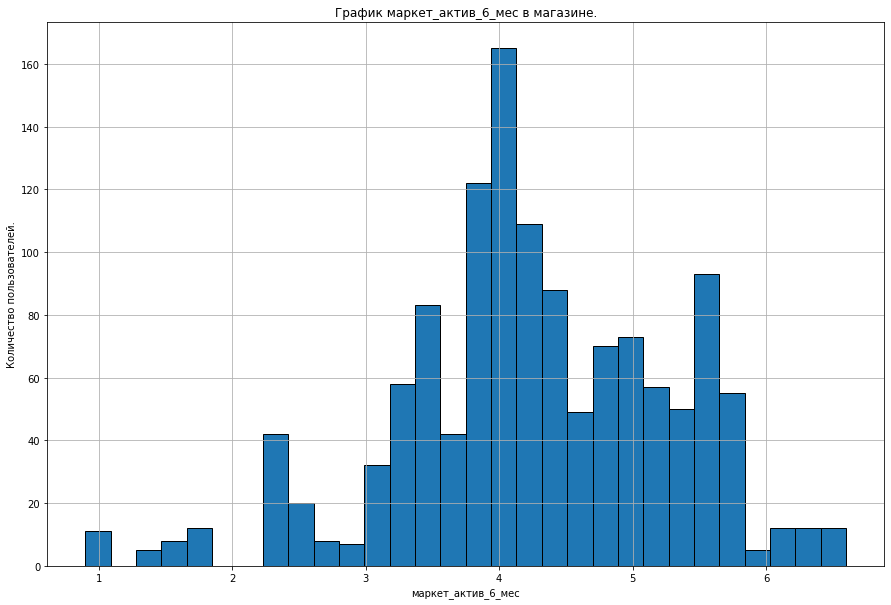

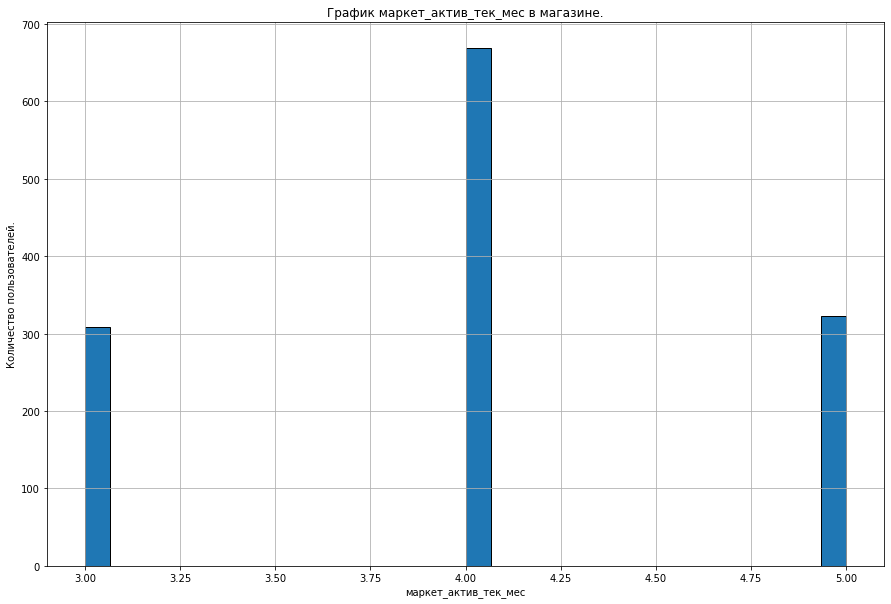

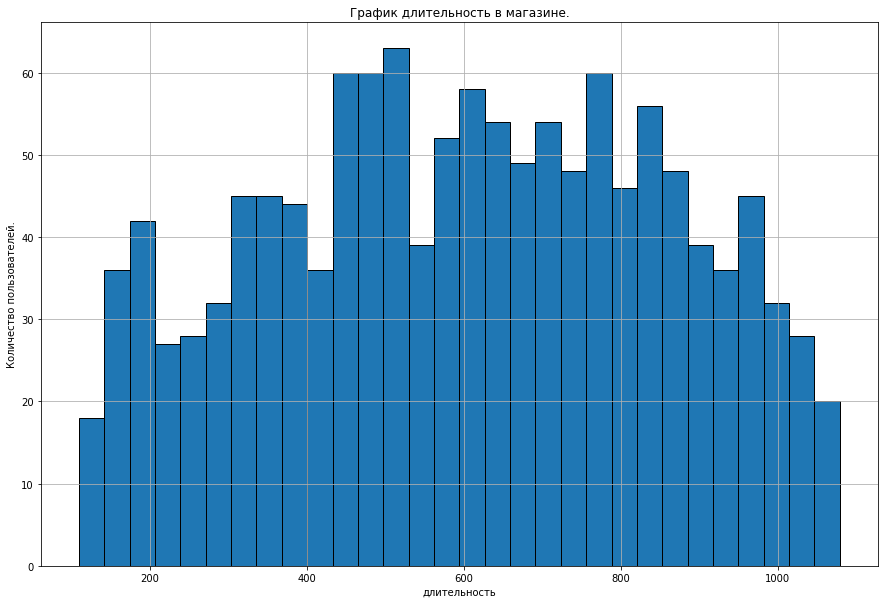

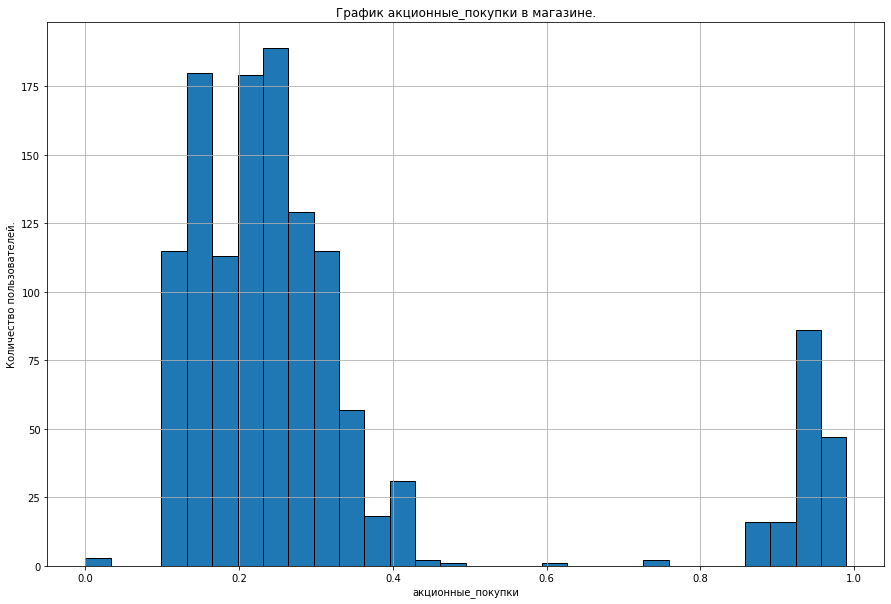

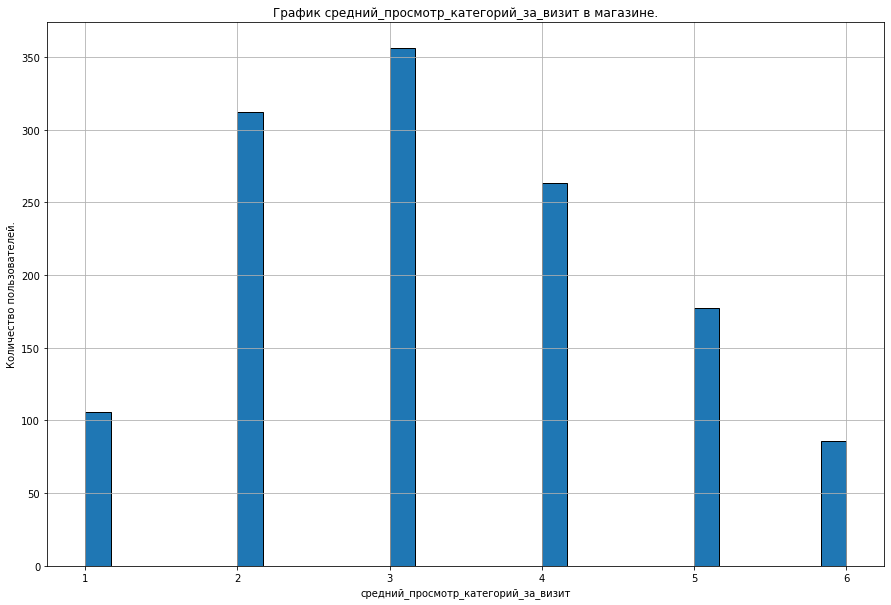

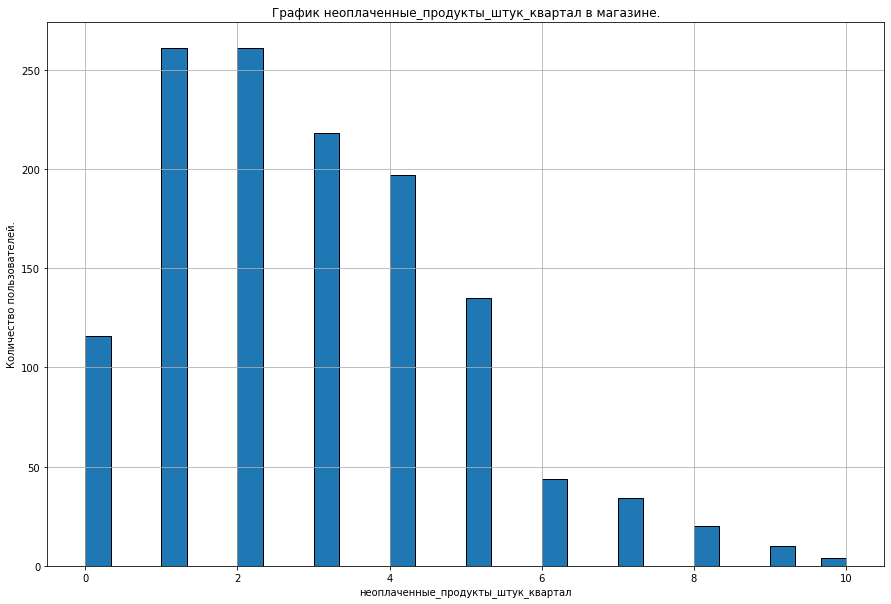

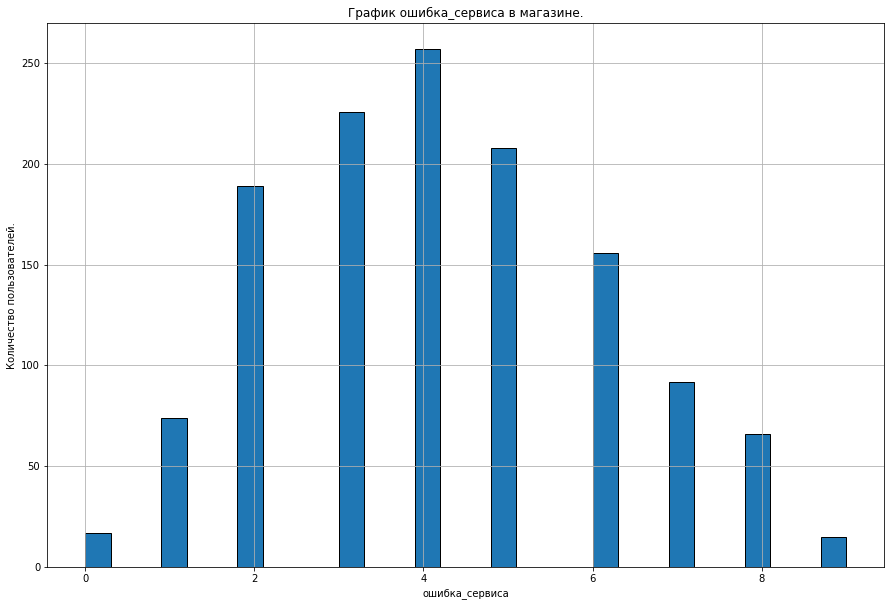

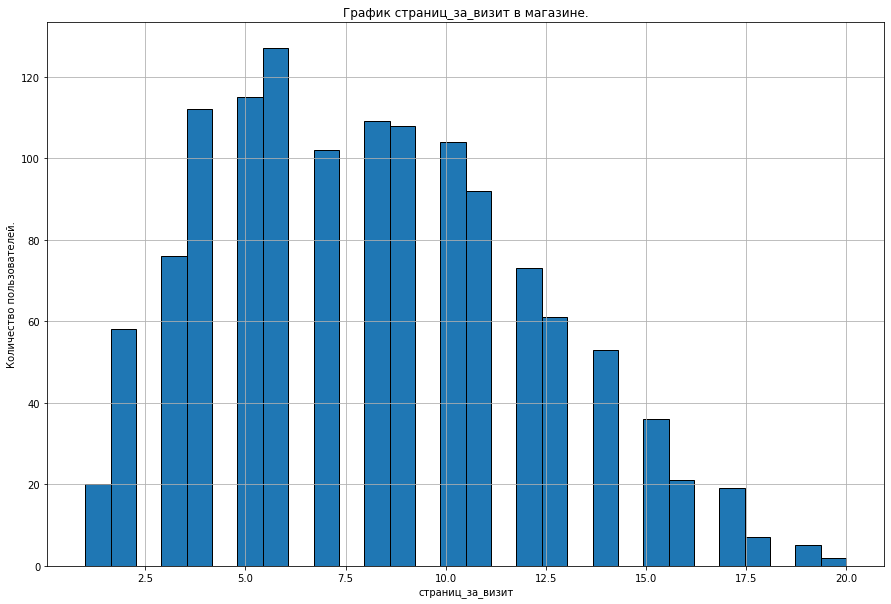

In [34]:
for i in market_file_data_list:
    market_file_data[i].plot.hist(bins=30, figsize=(15, 10), grid=True, ec='black');
    plt.xlabel(i)
    plt.ylabel('Количество пользователей.')
    plt.title(f'График {i} в магазине.')
    plt.show()

Просмотрев графики и таблицу describe аномалии или выбросы обнаружены не были, распределение около нормального наблюдается на графиках столбцов ошибка_сервиса и средний_просмотр_категорий_за_визит, в остальных столбцах можно заметить сильное смещение, а также множественные пики и разброс.

***Категориальные признаки***

In [35]:
def get_obj_names(data):
    columns_list = []
    for i in data.columns:
        if data[i].dtypes == 'object':
            columns_list.append(i)
    return columns_list

In [36]:
market_file_data_list_obj = get_obj_names(market_file_data)

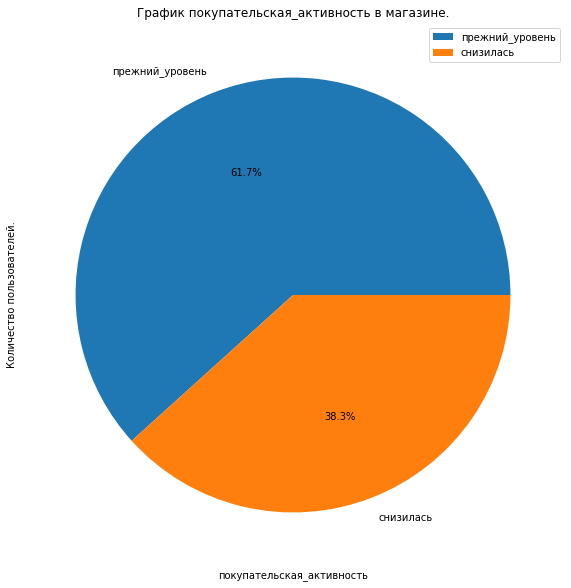

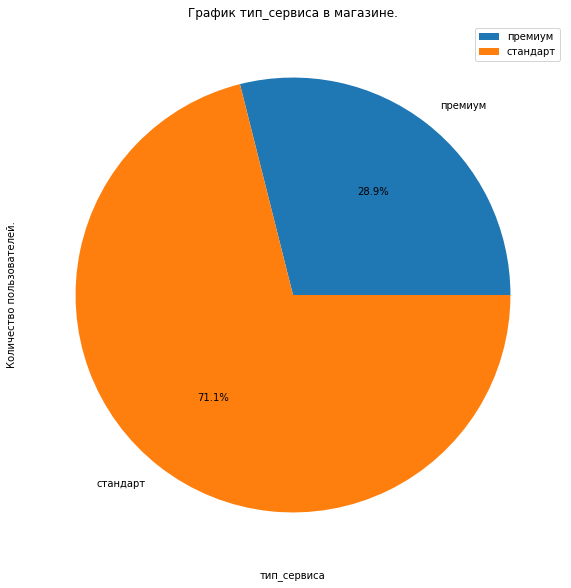

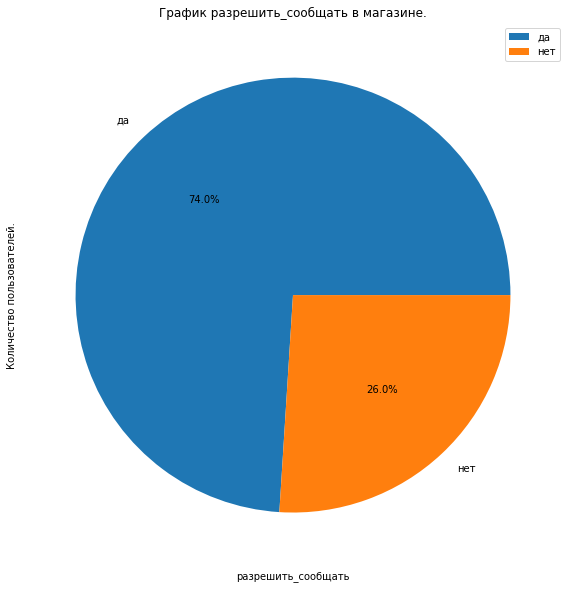

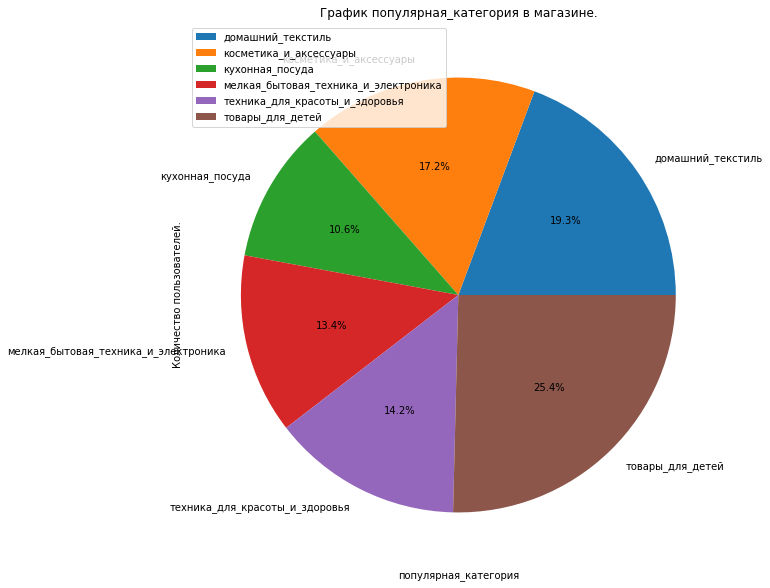

In [37]:
for i in market_file_data_list_obj:
    market_file_data.pivot_table(index=i, values='id', aggfunc='count').plot.pie(
        figsize=(15, 10), grid=True, subplots=True, autopct='%1.1f%%');
    plt.xlabel(i)
    plt.ylabel('Количество пользователей.')
    plt.title(f'График {i} в магазине.')
    plt.show()

Построив графики категориальных признаков я заметил дисбаланс классов.

***market_money_data***

***Количественные признаки***

Выведу describe количественных признаков, после чего изучу их графики, а также займусь аномалиями.

In [38]:
market_money_data.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [39]:
market_money_data_list = get_float_and_int_col_names(market_money_data)

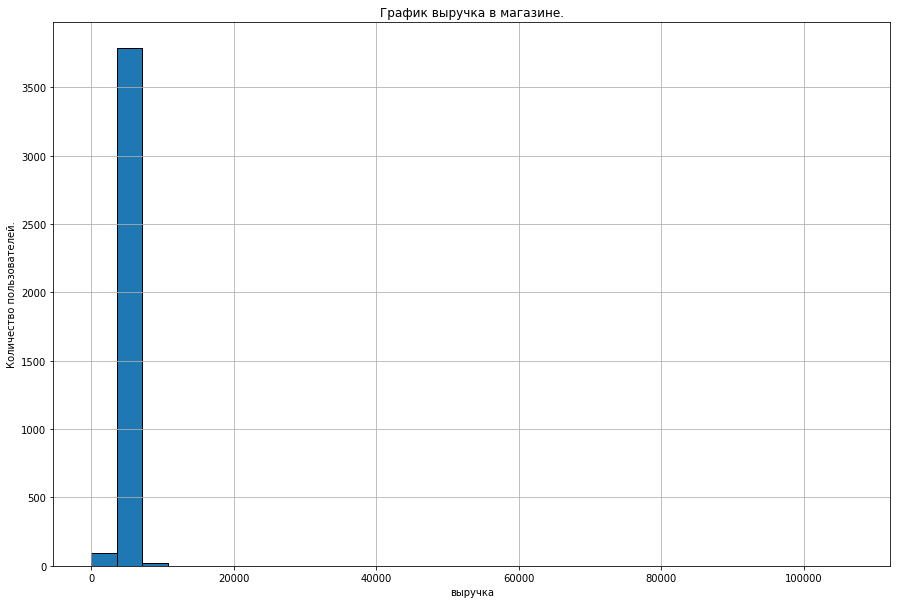

In [40]:
for i in market_money_data_list:
    market_money_data[i].plot.hist(bins=30, figsize=(15, 10), grid=True, ec='black');
    plt.xlabel(i)
    plt.ylabel('Количество пользователей.')
    plt.title(f'График {i} в магазине.')
    plt.show()

Построив график становится очевидно, что в данных есть выбросы, выведу отсортированные по соответствующему столбцу данные в порядке убывания и возрастания:

In [41]:
market_money_data.sort_values(by='выручка', ascending=False).head(10)

,id,период,выручка
98,215380,текущий_месяц,106862.2
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3
1481,215841,текущий_месяц,7557.0
2388,216144,текущий_месяц,7547.8
566,215536,текущий_месяц,7467.9
2266,216103,текущий_месяц,7410.0
1003,215682,текущий_месяц,7401.6
1632,215892,текущий_месяц,7401.6
1573,215872,текущий_месяц,7374.0


In [42]:
market_money_data.sort_values(by='выручка', ascending=True).head(10)

,id,период,выручка
0,215348,позапрошлый_месяц,0.0
2,215348,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,позапрошлый_месяц,0.0
28,215357,позапрошлый_месяц,0.0
29,215357,предыдущий_месяц,0.0
356,215466,текущий_месяц,2758.7
649,215564,предыдущий_месяц,2890.0
662,215568,предыдущий_месяц,2909.0
2485,216176,текущий_месяц,2952.2


Есть выбросы, удалю их и еще раз просмотрю график:

In [43]:
market_money_data = market_money_data.query('(выручка != 106862.2) & (выручка != 0)')

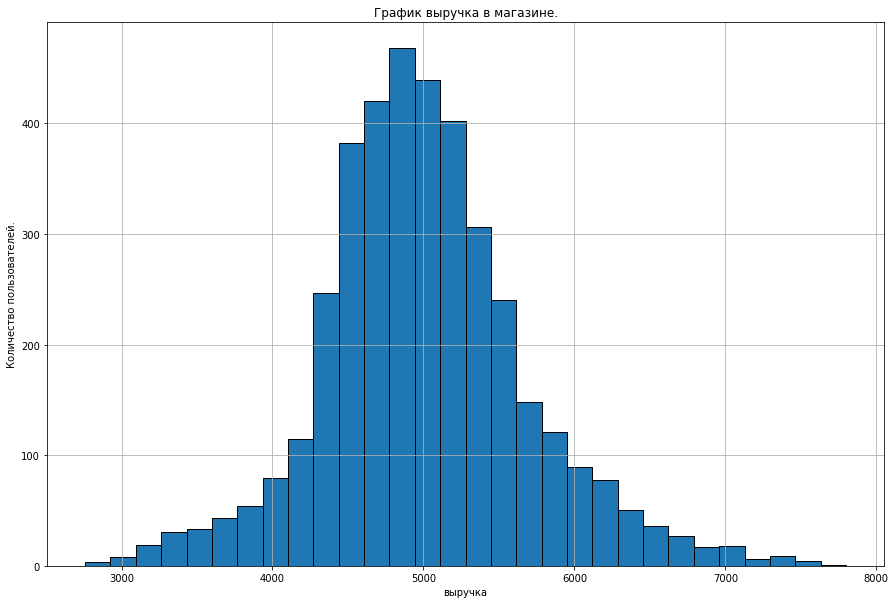

In [44]:
for i in market_money_data_list:
    market_money_data[i].plot.hist(bins=30, figsize=(15, 10), grid=True, ec='black');
    plt.xlabel(i)
    plt.ylabel('Количество пользователей.')
    plt.title(f'График {i} в магазине.')
    plt.show()

Распределение выручки магазина близко к нормальному, прослеживается симметрия и колокольная кривая.

***Категориальные признаки***

In [45]:
market_money_data_list_obj = get_obj_names(market_money_data)

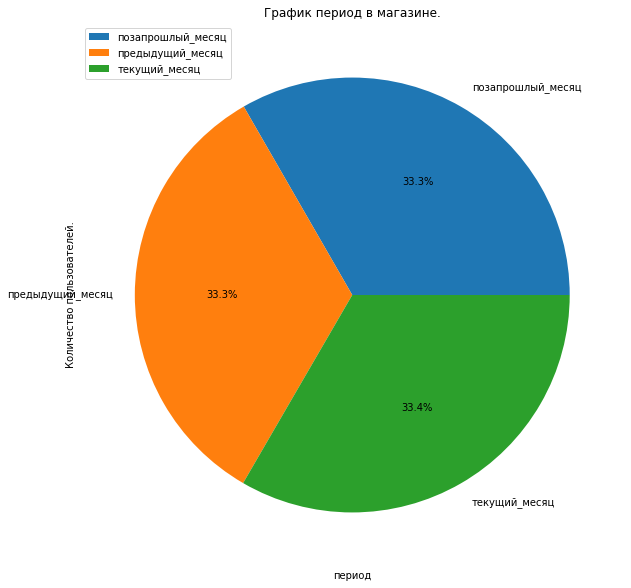

In [46]:
for i in market_money_data_list_obj:
    market_money_data.pivot_table(index=i, values='id', aggfunc='count').plot.pie(
        figsize=(15, 10), grid=True, subplots=True, autopct='%1.1f%%');
    plt.xlabel(i)
    plt.ylabel('Количество пользователей.')
    plt.title(f'График {i} в магазине.')
    plt.show()

Классы признака период отлично сбалансированы.

***market_time_data***

***Количественные признаки***

Выведу describe количественных признаков, после чего изучу их графики, а также займусь аномалиями.

In [47]:
market_time_data.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


In [48]:
market_time_data_list = get_float_and_int_col_names(market_time_data)

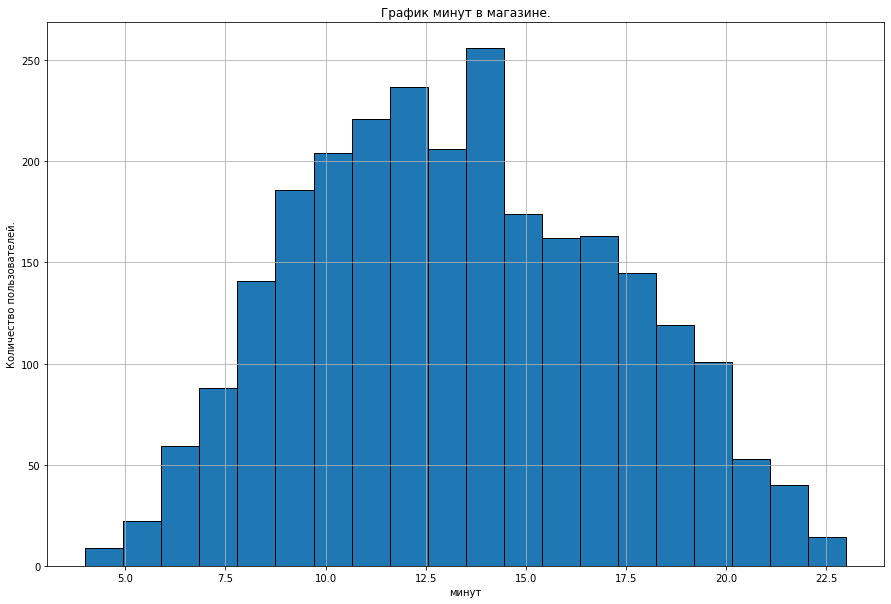

In [49]:
for i in market_time_data_list:
    market_time_data[i].plot.hist(bins=20, figsize=(15, 10), grid=True, ec='black');
    plt.xlabel(i)
    plt.ylabel('Количество пользователей.')
    plt.title(f'График {i} в магазине.')
    plt.show()

Распределение минут не является нормальным из-за двойного пика.

***Категориальные признаки***

In [50]:
market_time_data_obj = get_obj_names(market_time_data)

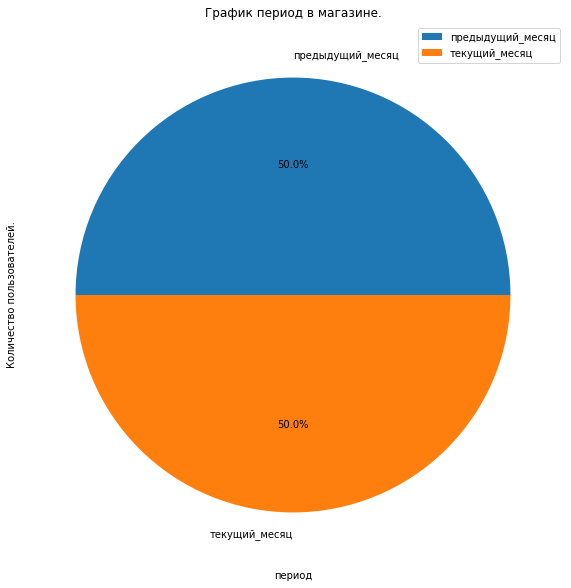

In [51]:
for i in market_time_data_obj:
    market_time_data.pivot_table(index=i, values='id', aggfunc='count').plot.pie(
        figsize=(15, 10), grid=True, subplots=True, autopct='%1.1f%%');
    plt.xlabel(i)
    plt.ylabel('Количество пользователей.')
    plt.title(f'График {i} в магазине.')
    plt.show()

Признак период очень хорошо сбалансирован.

***money_data***

***Количественные признаки***

Выведу describe количественных признаков, после чего изучу их графики, а также займусь аномалиями.

In [52]:
money_data.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


In [53]:
money_data_list = get_float_and_int_col_names(money_data)

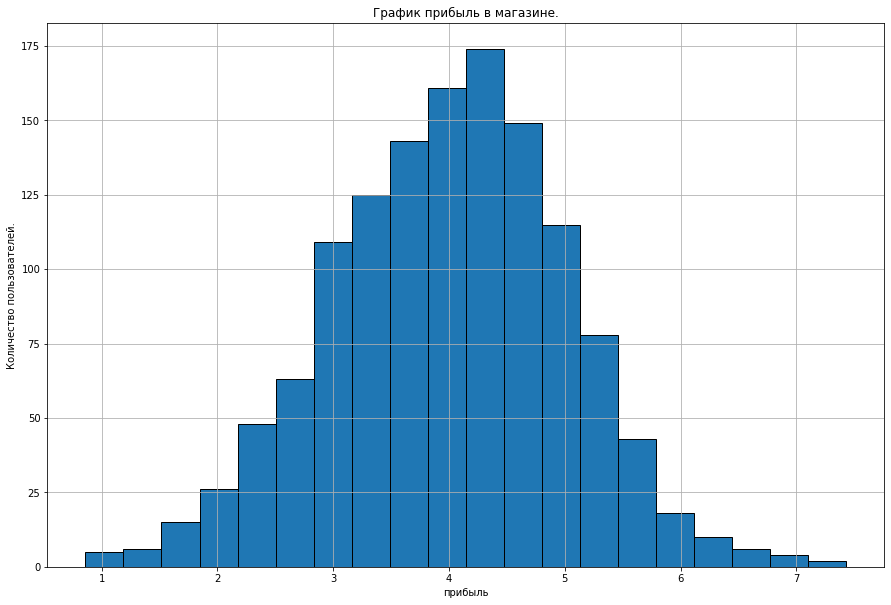

In [54]:
for i in money_data_list:
    money_data[i].plot.hist(bins=20, figsize=(15, 10), grid=True, ec='black');
    plt.xlabel(i)
    plt.ylabel('Количество пользователей.')
    plt.title(f'График {i} в магазине.')
    plt.show()

Распределение прибыли близко к нормальному с небольшим смещением вправо, аномалий не наблюдается.

***Категориальные признаки***

Категориальных признаков нет.

***Активные пользователи***

Составлю новый датасет об активных пользователях за последние три месяца, который будет содержать в себе суммарную выручку по уникальному id.

In [55]:
market_money_data.head()

,id,период,выручка
1,215348,текущий_месяц,3293.1
3,215349,позапрошлый_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,позапрошлый_месяц,4826.0


In [56]:
active_users_data = market_money_data.groupby('id', as_index=False)['выручка'].sum()
active_users_data

,id,выручка
0,215348,3293.1
1,215349,14659.6
2,215350,15341.9
3,215351,17561.4
4,215352,16274.0
...,...,...
1295,216643,13109.7
1296,216644,15381.0
1297,216645,15633.2
1298,216646,14872.6


In [57]:
active_users_data.duplicated(subset='id').sum()

0

***Вывод***

В процессе исследовательского анализа данных были устранены все аномалии и выбросы в данных, выяснилось, что распределение около нормального наблюдается на графиках столбцов ошибка_сервиса и средний_просмотр_категорий_за_визит датасета market_file_data, в остальных столбцах можно заметить сильное смещение, а также множественные пики и разброс. В категориальных данных дисбаланс.

Распределение выручки магазина в датасете market_money_data близко к нормальному, прослеживается симметрия и колокольная кривая.

Распределение минут датасета market_time_data не является нормальным из-за двойного пика.

Распределение прибыли датафрейма money_data близко к нормальному с небольшим смещением вправо, аномалий не наблюдается.

Во всех датасетах кроме market_file_data в категориальных признаках дисбаланс не обнаружен.

Были отобраны активные пользователи в отдельный датасет active_users_data.

## Объединение таблиц

Объединю таблицы market_file.csv, market_money.csv, market_time.csv. 

Создам новый датасет market_money_data_fp, который будет содержать в себе период из датафрейма market_money_data разбитый по столбцам периода. Проверю пустые значения.

In [58]:
market_money_data_fp = market_money_data.pivot(index='id', columns='период', values='выручка').reset_index()
market_money_data_fp.rename(columns={
    'позапрошлый_месяц': 'выручка_позапрошлый',
    'предыдущий_месяц': 'выручка_предыдущий',
    'текущий_месяц': 'выручка_текущий'}, inplace=True)
market_money_data_fp

период,id,выручка_позапрошлый,выручка_предыдущий,выручка_текущий
0,215348,NaN,NaN,3293.1
1,215349,4472.0,5216.0,4971.6
2,215350,4826.0,5457.5,5058.4
3,215351,4793.0,6158.0,6610.4
4,215352,4594.0,5807.5,5872.5
...,...,...,...,...
1295,216643,4704.0,3664.0,4741.7
1296,216644,5299.0,4729.0,5353.0
1297,216645,5334.0,5160.0,5139.2
1298,216646,4725.0,4923.0,5224.6


In [59]:
market_money_data_fp.isna().sum()

период
id                     0
выручка_позапрошлый    3
выручка_предыдущий     3
выручка_текущий        1
dtype: int64

In [60]:
market_money_data_fp = market_money_data_fp.dropna()

In [61]:
market_money_data_fp.isna().sum()

период
id                     0
выручка_позапрошлый    0
выручка_предыдущий     0
выручка_текущий        0
dtype: int64

Создам новый датасет market_time_data_fp, который будет содержать в себе период из датафрейма market_time_data разбитый по столбцам периода. Проверю пустые значения.

In [62]:
market_time_data.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


In [63]:
market_time_data_fp = market_time_data.pivot(index='id', columns='период', values='минут').reset_index()
market_time_data_fp.rename(columns={
    'позапрошлый_месяц': 'минут_позапрошлый',
    'предыдущий_месяц': 'минут_предыдущий',
    'текущий_месяц': 'минут_текущий'}, inplace=True)
market_time_data_fp

период,id,минут_предыдущий,минут_текущий
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11
...,...,...,...
1295,216643,14,7
1296,216644,12,11
1297,216645,12,18
1298,216646,18,7


In [64]:
market_time_data_fp.isna().sum()

период
id                  0
минут_предыдущий    0
минут_текущий       0
dtype: int64

Создам датасет merged_market_data, который объединит в себе market_file_data, market_money_data_fp и market_time_data_fp. Проверю размерности и пропущенные значения

In [65]:
merged_market_data = market_file_data.merge(market_money_data_fp, on='id').merge(market_time_data_fp, on='id')
merged_market_data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый,выручка_предыдущий,выручка_текущий,минут_предыдущий,минут_текущий
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [66]:
merged_market_data.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_позапрошлый                    0
выручка_предыдущий                     0
выручка_текущий                        0
минут_предыдущий                       0
минут_текущий                          0
dtype: int64

In [67]:
merged_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

In [68]:
merged_market_data.shape

(1296, 18)

In [69]:
merged_market_data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый,выручка_предыдущий,выручка_текущий,минут_предыдущий,минут_текущий
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


Заменю целевой признак на нули и единицы(снизилась - 0, прежний_уровень - 1):

In [70]:
merged_market_data.loc[merged_market_data['покупательская_активность'] == 'снизилась', 'покупательская_активность'] = 0
merged_market_data.loc[merged_market_data['покупательская_активность'] == 'прежний_уровень', 'покупательская_активность'] = 1

In [71]:
merged_market_data['покупательская_активность'] = merged_market_data['покупательская_активность'].astype('int')

***Выводы***

Был создан датасет merged_market_data, который объединил в себе market_file_data, market_money_data_fp и market_time_data_fp. Были проверены размерности и нулевые значения. В целевой признак был введен индикатор.

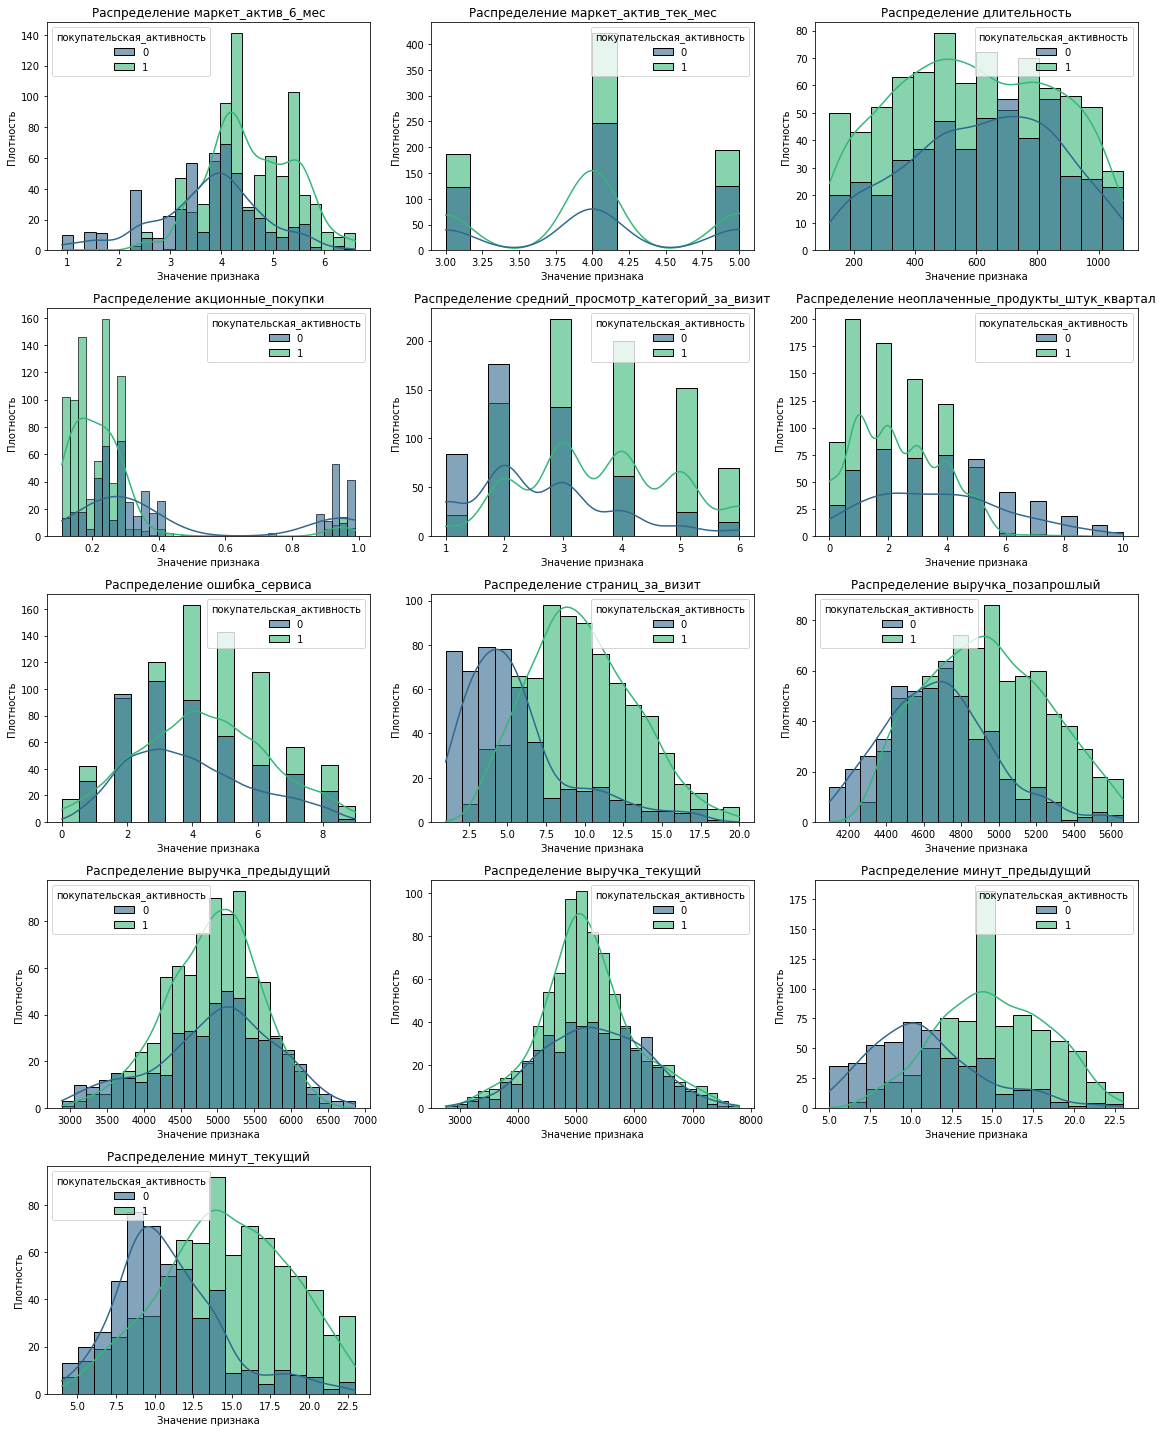

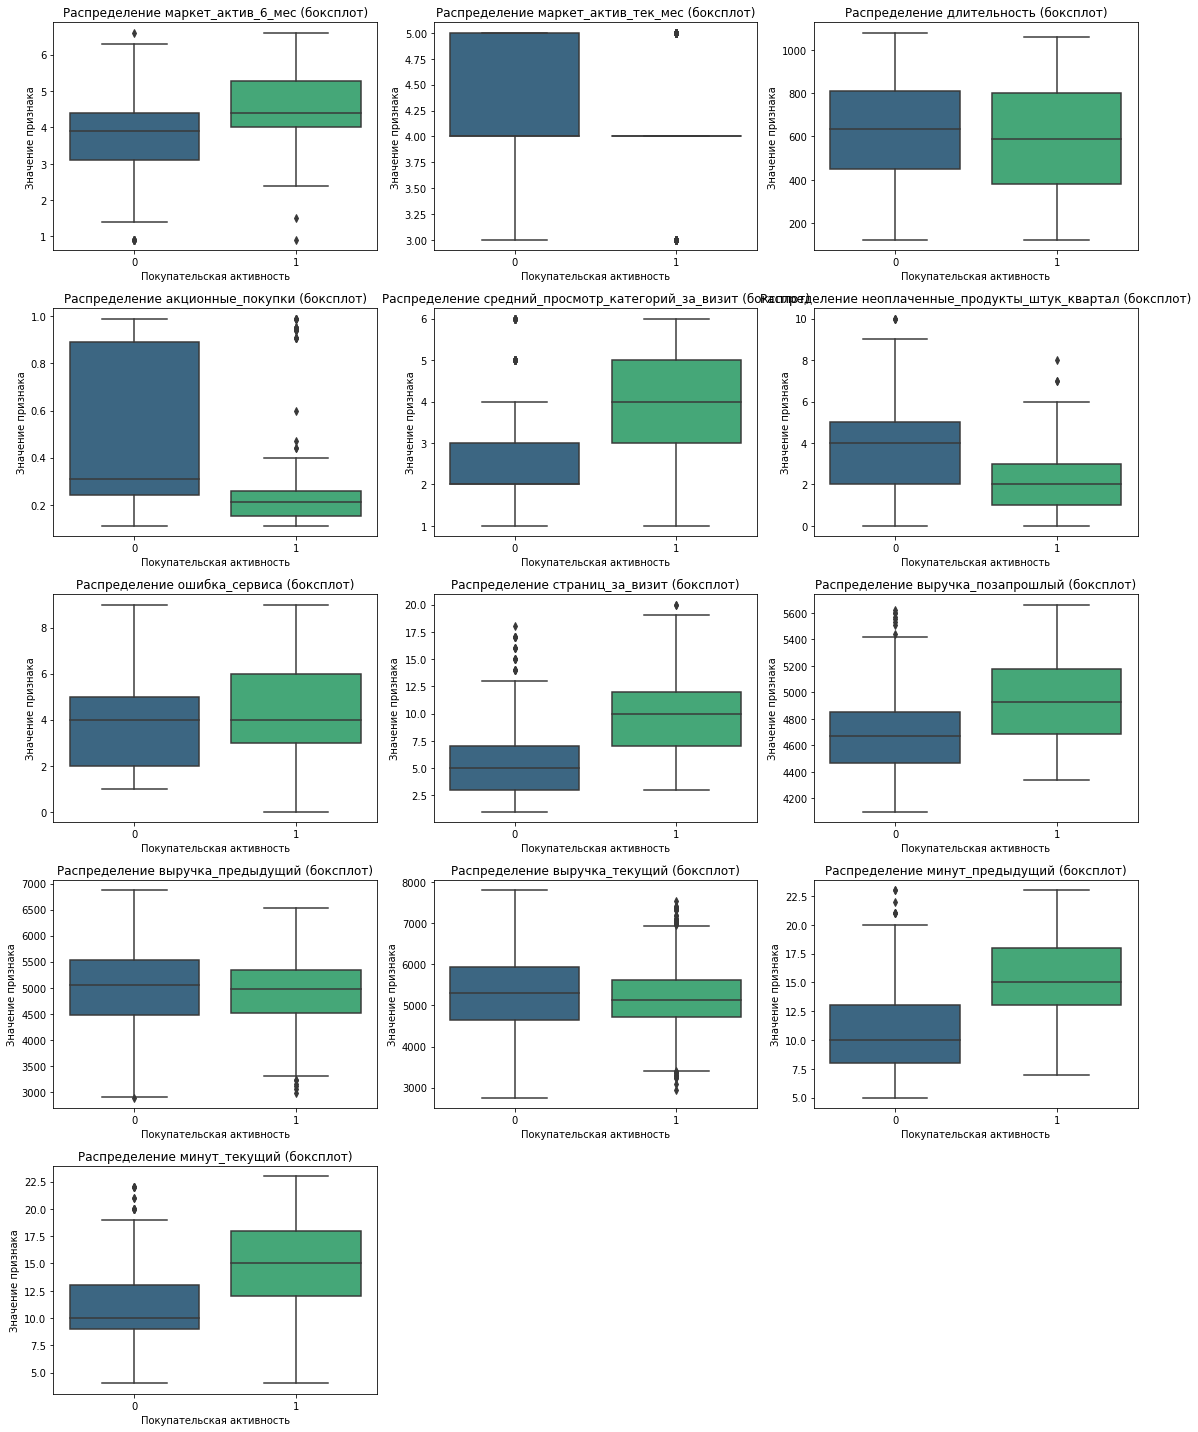

In [72]:
numeric_features = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_позапрошлый',
    'выручка_предыдущий',
    'выручка_текущий',
    'минут_предыдущий',
    'минут_текущий',
]

plt.figure(figsize=(16, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data=merged_market_data, x=feature, hue='покупательская_активность', kde=True, palette='viridis', alpha=0.6)
    plt.title(f'Распределение {feature}')
    plt.xlabel('Значение признака')
    plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data=merged_market_data, y=feature, x='покупательская_активность', palette='viridis')
    plt.title(f'Распределение {feature} (боксплот)')
    plt.xlabel('Покупательская активность')
    plt.ylabel('Значение признака')

plt.tight_layout()
plt.show()

Для большинства признаков распределения достаточно узкие, что указывает на близкие значения внутри категории сниженной покупательской активности.
Признаки, такие как выручка (предыдущий и текущий периоды), длительность визитов, показывают больший разброс.

Для таких признаков, как маркет актив 6 мес и акционные покупки, диапазон варьируется, но медианы стабильны.
В некоторых признаках есть выделяющиеся значения, например, в неоплаченные продукты.

***Портрет уходящего клиента:***

Чаще всего это клиенты с низкой маркетинговой активностью за текущие и прошлые месяцы.
Количество акционных покупок и средний просмотр категорий за визит также имеют тенденцию к снижению.
Выручка в текущем периоде часто ниже или стабильна.
Эти признаки могут сигнализировать о риске снижения активности.

## Корреляционный анализ

Проведу корреляционный анализ данных, для этого выберу корреляцию Спирмена, построю таблицу корреляции.

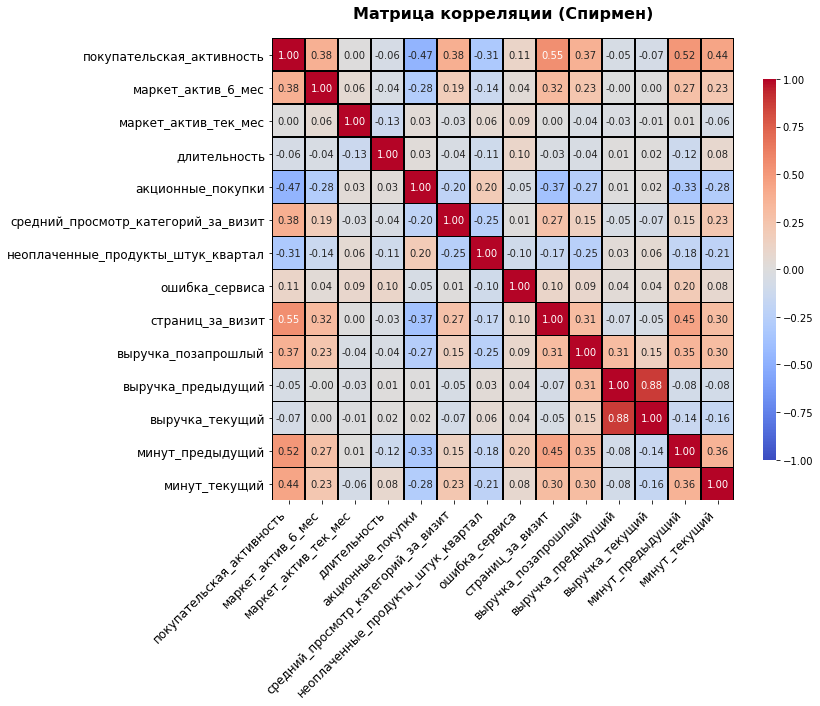

In [73]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    merged_market_data.drop('id', axis=1).corr(method='spearman'),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='black',
    cbar_kws={"shrink": 0.8, "aspect": 30},
    square=True
)

plt.title("Матрица корреляции (Спирмен)", fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Корреляции выше 0.9 не обнаружено, признаки удалять не пришлось.

***Выводы***

Корреляции выше 0.9 не обнаружено, признаки удалять не пришлось.

## Использование пайплайнов

Создам все необходимые пайплайны для обработки данных, сделаю словарь с моделями, после чего подберу лучшие гиперпараметры с помощью RandomizedSearchCV.

In [74]:
simplefilter(action='ignore', category=FutureWarning)

In [75]:
merged_market_data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый,выручка_предыдущий,выручка_текущий,минут_предыдущий,минут_текущий
0,215349,0,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,0,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,0,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,0,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,0,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [76]:
merged_market_data_wi = merged_market_data.drop(columns=['id'], axis=1)

Константы:

In [77]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Разделю данные по выборкам:

In [78]:
X = merged_market_data_wi.drop(columns='покупательская_активность', axis=1)
y = merged_market_data_wi['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=TEST_SIZE, stratify=y)

Создам списки названий разных признаков:

In [79]:
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса', 'страниц_за_визит', 'выручка_позапрошлый', 'выручка_текущий', 'минут_предыдущий', 'минут_текущий', 'выручка_предыдущий']
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']

Создам пайплайны для подготовки признаков и финальный пайплайн:

In [80]:
ohe_pipe = Pipeline([
    ('ohe',
        OneHotEncoder(
            drop='first'))])

ord_pipe = Pipeline([
    ('ord',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=np.nan, categories=[['стандарт', 'премиум']])),
    ('simple_Imputer',
        SimpleImputer(
            missing_values=np.nan,
            strategy='most_frequent'))])

data_preprocessor = ColumnTransformer([
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)],
    remainder='passthrough')

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(random_state=RANDOM_STATE, probability=True))])

Создам словарь с подготовкой данных и моделями:

In [81]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE, class_weight='balanced', probability=True)],
        'models__C': [0.1, 1, 10],
        'models__kernel': ['linear', 'rbf', 'poly'],
        'models__gamma': ['scale', 'auto'],
        'models__degree': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
     
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

С помощью RandomizedSearchCV найду лучшую модель по метрике ROC-AUC, эту метрику я выбрал не случайно - дело в том, что она позволяет оценить модель при разных порогах вероятности, также эта метрика хороша при бинарной классификации и может работать с данными, в которых есть дисбаланс.

In [82]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('ord',
                                                                                                OrdinalEncoder

Выведу метрики лучшей модели:

In [83]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Score модели:', randomized_search.best_score_)

probabilities = randomized_search.best_estimator_.predict_proba(X_test)[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, probabilities))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                                                               'премиум']],
                                                                                  handle_unknown='use_encoded_value',
                               

Лучшей моделью оказалась SVC с полиномиальным ядром, а также degree=2 и С=1.

***Выводы***

Были сделаны нужные пайплайны для обработки данных, признаки рассортированы по спискам и с помощью RandomizedSearchCV была получена лучшая модель, которой оказалась SVC с полиномиальным ядром, а также degree=2 и С=1. 

## Анализ важности признаков

построю график с помощью SHAP и проведу анализ важности признаков, сделаю выводы о значимости признаков.

  0%|          | 0/150 [00:00<?, ?it/s]

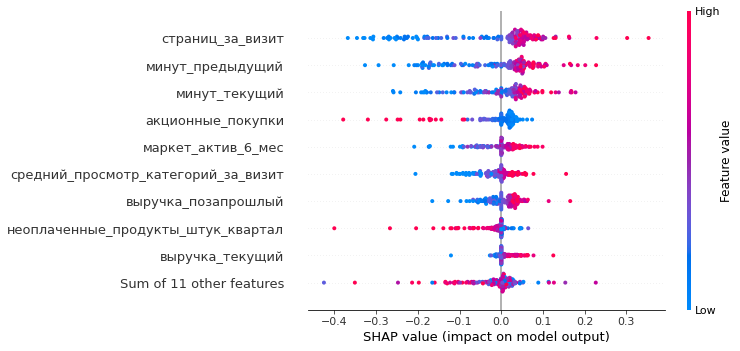

In [84]:
pipe_final.fit(X_train, y_train)
model_svc = randomized_search.best_estimator_.named_steps['models']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

X_train_preprocessed = preprocessor.transform(X_train)

ohe_feature_names = preprocessor.named_transformers_['ohe'].named_steps['ohe'].get_feature_names(ohe_columns)
ord_feature_names = ord_columns 
num_feature_names = num_columns

all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])


X_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)


background = shap.sample(X_preprocessed_df, 10)
X_sample = shap.sample(X_preprocessed_df, 150)

explainer = shap.KernelExplainer(pipe_final.named_steps['models'].predict, background, nsamples=100)
shap_values = explainer.shap_values(X_sample)

shap_values_explanation = shap.Explanation(values=shap_values,
                                           base_values=explainer.expected_value,
                                           data=X_sample)

shap.plots.beeswarm(shap_values_explanation)

На графике SHAP-значений видно, что ключевое влияние на модель оказывают признаки страниц_за_визит, минут_предыдущий и минут_текущий. Увеличение их значений положительно связано с целевой переменной. Акционные_покупки демонстрируют отрицательную корреляцию с покупательской_активностью (-0.47), что может говорить о снижении лояльности у клиентов, совершающих покупки преимущественно по акциям (более 80 %).

Рекомендуется собирать больше данных об активности, включая частоту возвратов на сайт, взаимодействие с рекламой и завершенностью покупок. Это позволит улучшить персонализацию предложений, разработать стратегии удержания клиентов.

***Вывод***

Была проведена оценка важностей различных признаков с помощью SHAP-значений:

Можно посоветовать заказчику собирать больше данных об активности, отталкиваться от нее в принятии бизнес-решений, а также можно добавить новые признаки, например частоту возвращения на сайт. Эти новые признаки могут помочь более точно оценивать поведение пользователей и выявлять закономерности, которые улучшают пользовательский опыт.

Кроме того, имеет смысл рассмотреть возможность сбора данных о взаимодействии с рекламными материалами, такими как клики на баннеры или переходы по ссылкам в email-рассылках. Эти данные могут дать ценную информацию о том, как реклама влияет на посещаемость и поведение пользователей в интернет-магазине.

Также полезно внедрить систему отслеживания завершенности покупок, чтобы анализировать не только количество визитов, но и их конечные результаты. Систематизация таких данных позволит лучше понять, на каких стадиях пользователи теряют интерес и как это можно исправить.

Отслеживание поведения пользователя со временем может привести к созданию более персонализированных маркетинговых стратегий и предложений, которые могут существенно повысить уровень удовлетворенности покупателей и поспособствовать удержанию постоянных клиентов.

Все это даст возможность еще точнее оценить поведение пользователей для персонализации предложений.

## Сегментация покупателей

Выделю сегмент клиентов с низкой вероятностью принадлежности к классу былой активности (то есть клиенты со снижающейся активностью) и высокой выручкой - эти пользователи составляют наиболее ценный сегмент, так как снижение их активности может нанести значительный ущерб бизнесу, удержание этих пользователей позволит минимизировать потери выручки.

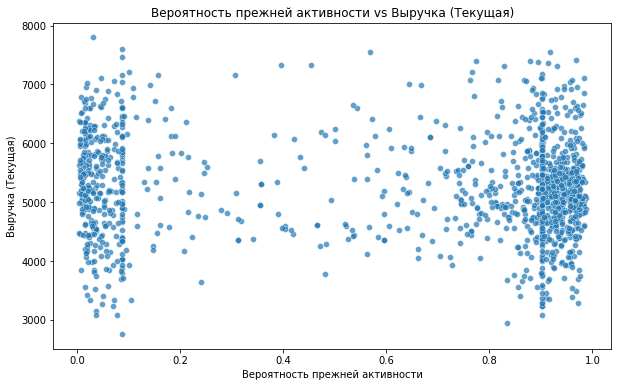

In [85]:
probabilities_1 = randomized_search.best_estimator_.predict_proba(X)[:, 1]
merged_market_data['вероятность_прежней_активности'] = probabilities_1

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=merged_market_data['вероятность_прежней_активности'],
    y=merged_market_data['выручка_текущий'],
    alpha=0.7
)

plt.title('Вероятность прежней активности vs Выручка (Текущая)')
plt.xlabel('Вероятность прежней активности')
plt.ylabel('Выручка (Текущая)')
plt.show()


На графике можно увидеть, как изменяется распределение пользователей по вероятности снижения активности и выручке. Большинство клиентов сосредоточено в правой части графика, у них высокая вероятность остаться на текущем уровне активности, там выручка распределена более равномерно. В левой части графика, там низкая вероятность, количество клиентов заметно меньше, но именно эти клиенты представляют риск для бизнеса. Те, кто находится ниже порога 0.3, представляют собой группу с высоким риском. Именно на этих клиентах стоит сосредоточиться для анализа причин снижения активности. Точки выше порога выручки (квантиль 0.75) показывают пользователей, которые генерируют наибольшую выручку. Пересечение низкой вероятности остаться на текущем уровне активности и высокой выручки - это потенциально опасный сегмент, где мы теряем клиентов с высоким доходом. Такой сегмент важен для разработки стратегий удержания.

Построю этот же график с линиями вероятности ухода и выручки:

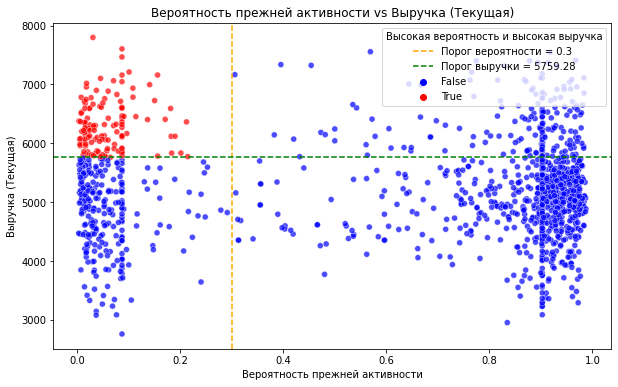

In [86]:
threshold_probability = 0.3
threshold_revenue = merged_market_data['выручка_текущий'].quantile(0.75)

high_risk_high_revenue = merged_market_data[
    (merged_market_data['вероятность_прежней_активности'] <= threshold_probability) & 
    (merged_market_data['выручка_текущий'] >= threshold_revenue)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=merged_market_data['вероятность_прежней_активности'],
    y=merged_market_data['выручка_текущий'],
    hue=(merged_market_data['вероятность_прежней_активности'] <= threshold_probability) & 
         (merged_market_data['выручка_текущий'] >= threshold_revenue),
    palette={True: 'red', False: 'blue'},
    alpha=0.7
    
)
plt.axvline(threshold_probability, color='orange', linestyle='--', label=f'Порог вероятности = {threshold_probability}')
plt.axhline(threshold_revenue, color='green', linestyle='--', label=f'Порог выручки = {threshold_revenue:.2f}')
plt.title('Вероятность прежней активности vs Выручка (Текущая)')
plt.xlabel('Вероятность прежней активности')
plt.ylabel('Выручка (Текущая)')
plt.legend(title='Высокая вероятность и высокая выручка', loc='upper right')
plt.show()

На графике рассеяния выше красными точками обозначены клиенты, вероятность прежней активности которых <= 0.3, а их выручка за текущий месяц находится в третьем квантиле.

<div class="alert alert-info">
Я неправильно назвал столбец с вероятностью, дело в том, что 1 - это пользователи с активностью прежнего уровня, а с 0 - клиенты с вероятным снижением, поэтому тут обратная логика, показатели предсказания модели - это вероятности класса 1, ты можешь удостовериться в этом в двух ячейках кода ниже. Переименовал столбец.
</div>

In [87]:
merged_market_data.query('(вероятность_прежней_активности >= 0.7) & (выручка_текущий >= @threshold_revenue)')

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый,выручка_предыдущий,выручка_текущий,минут_предыдущий,минут_текущий,вероятность_прежней_активности
106,215458,0,стандарт,да,4.4,3,851,0.32,косметика_и_аксесcуары,3,3,4,6,4925.0,5772.5,6187.2,14,15,0.795055
330,215682,0,премиум,да,5.8,3,724,0.17,косметика_и_аксесcуары,1,1,3,6,5124.0,6274.5,7401.6,11,13,0.774546
402,215754,1,премиум,да,4.6,3,937,0.14,домашний_текстиль,5,2,4,14,4752.0,5493.0,6265.2,7,12,0.923612
406,215758,1,премиум,да,5.7,5,486,0.15,мелкая_бытовая_техника_и_электроника,4,4,4,9,5095.0,5836.0,6608.2,14,12,0.965556
411,215763,1,стандарт,нет,3.7,3,300,0.23,мелкая_бытовая_техника_и_электроника,3,3,4,4,5228.0,6219.5,7208.8,12,14,0.765409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,216623,1,стандарт,да,3.4,4,663,0.22,кухонная_посуда,3,0,2,10,5609.0,6359.0,5840.3,11,17,0.890647
1272,216624,1,стандарт,да,5.4,5,806,0.17,домашний_текстиль,6,1,8,11,5096.0,5565.5,6102.4,22,19,0.907849
1278,216630,1,стандарт,да,4.4,4,488,0.29,домашний_текстиль,4,4,7,4,4833.0,5322.0,5875.8,17,16,0.873532
1281,216633,1,стандарт,нет,2.4,4,192,0.35,техника_для_красоты_и_здоровья,3,3,6,10,4651.0,5311.0,6013.0,20,6,0.850394


<div class="alert alert-info">
Как видно выше, тут почти все единицы и вероятности высокие (1 - это пользователь с прежней активностью), а я рассматриваю пользователей 0. А в коде где я делал срез ниже видно, что у всех низкая вероятность и класс 0.
</div>

Сделаю срез датасета пользователей, которые обозначены красными точками.

In [88]:
red_users = merged_market_data.query('(вероятность_прежней_активности <= 0.3) & (выручка_текущий >= @threshold_revenue)')
red_users.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый,выручка_предыдущий,выручка_текущий,минут_предыдущий,минут_текущий,вероятность_прежней_активности
2,215351,0,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6158.0,6610.4,11,13,0.086915
3,215352,0,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5807.5,5872.5,8,11,0.057423
5,215354,0,стандарт,да,5.1,3,431,0.23,косметика_и_аксесcуары,2,3,7,2,4503.0,5685.0,5869.6,11,12,0.086961
9,215360,0,премиум,да,3.9,3,623,0.35,кухонная_посуда,3,1,4,7,5555.0,5304.5,5834.9,9,6,0.201284
12,215363,0,стандарт,нет,4.9,4,923,0.29,товары_для_детей,6,0,3,1,4633.0,6010.0,6128.3,8,5,0.086958


In [89]:
red_users.shape

(137, 19)

Изучу получившуюся группу пользователей в разрезе различных признаков.

In [90]:
red_users_list = get_float_and_int_col_names(red_users.drop(columns=['вероятность_прежней_активности', 'покупательская_активность',
                                                                     'маркет_актив_тек_мес'], axis=1))

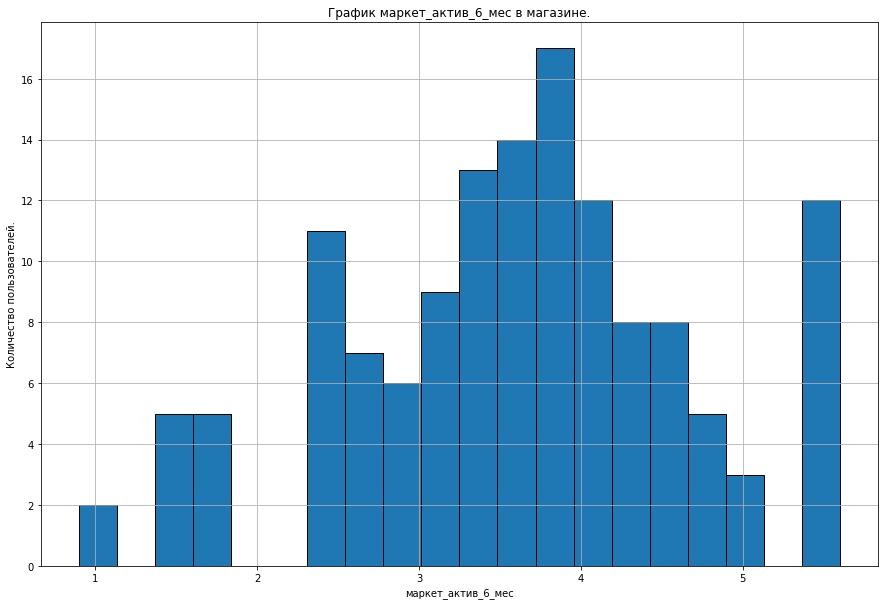

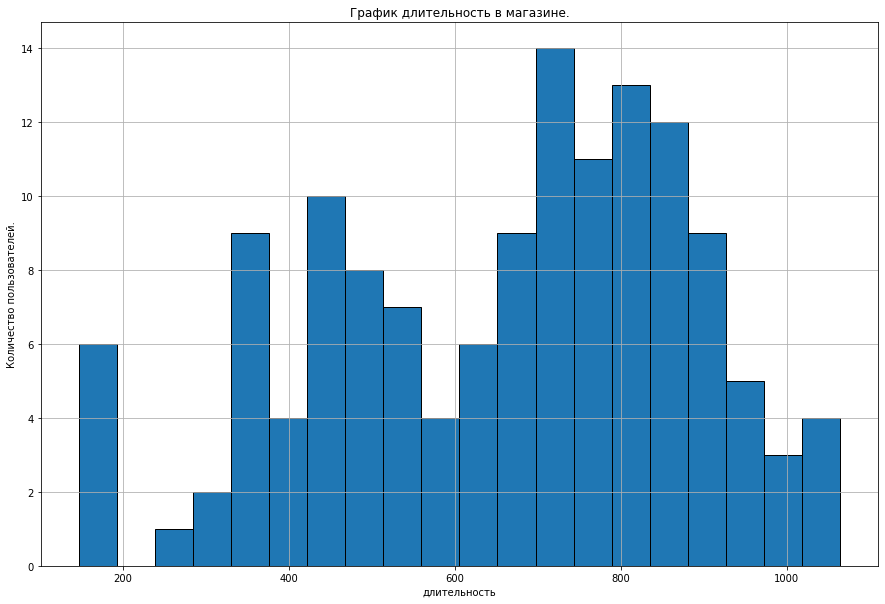

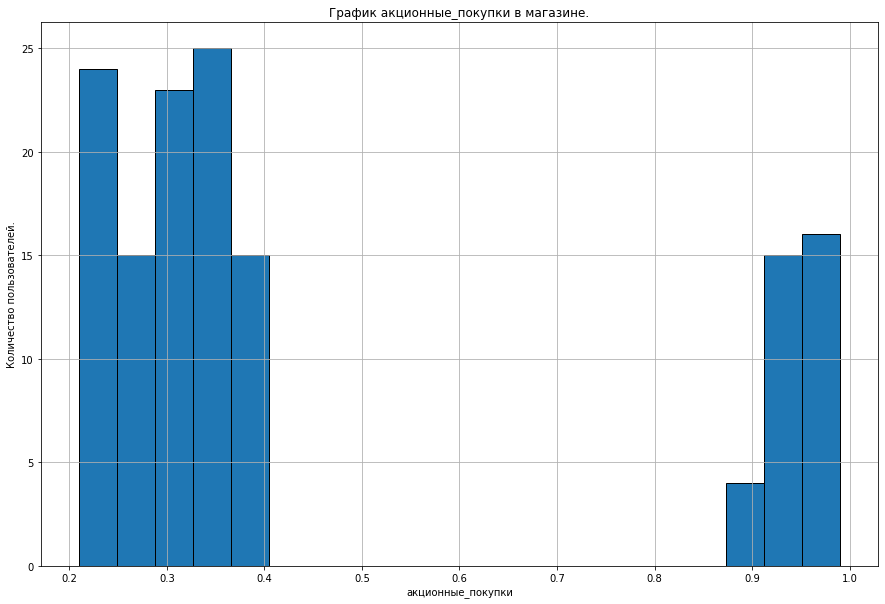

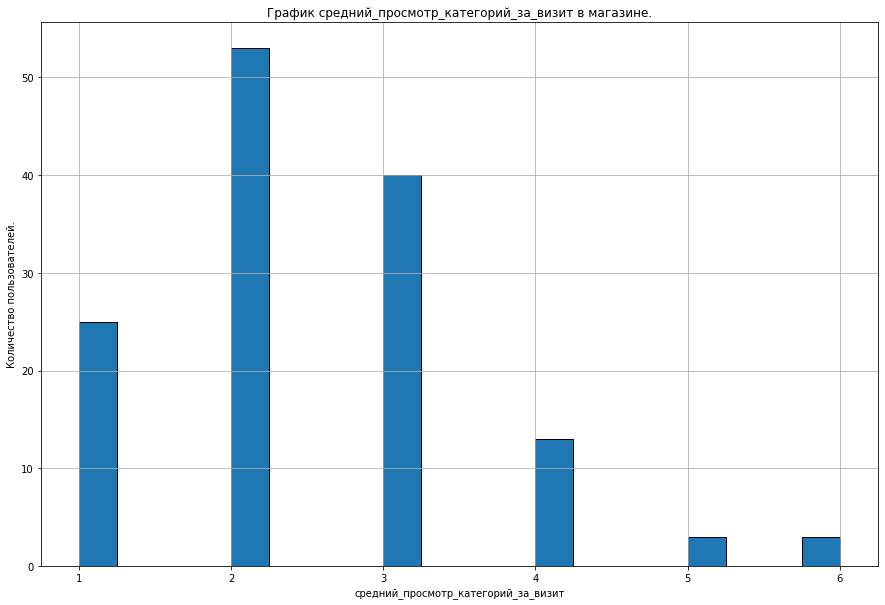

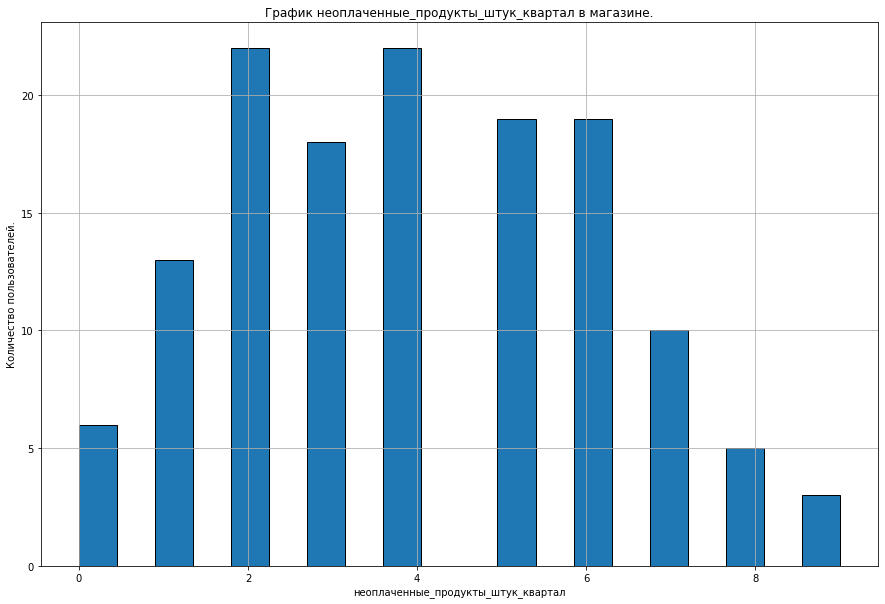

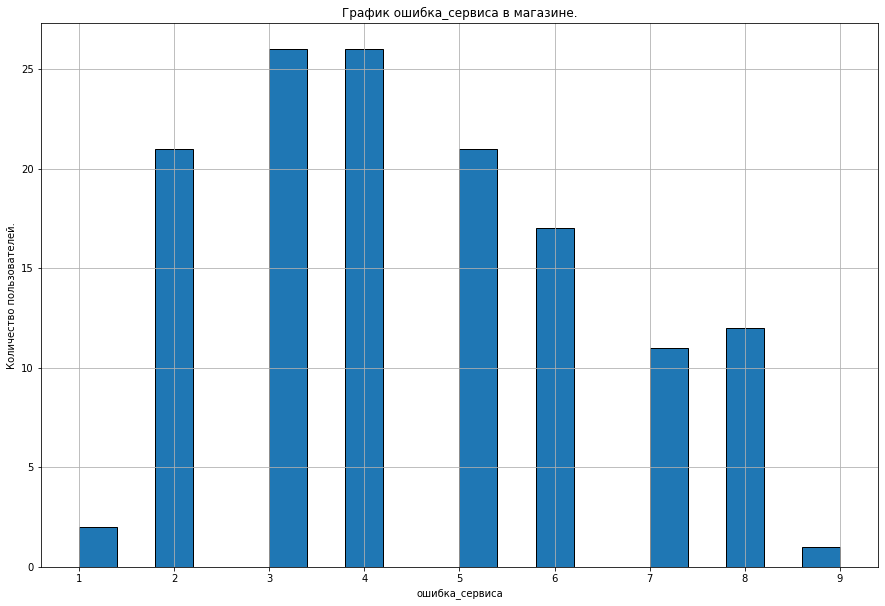

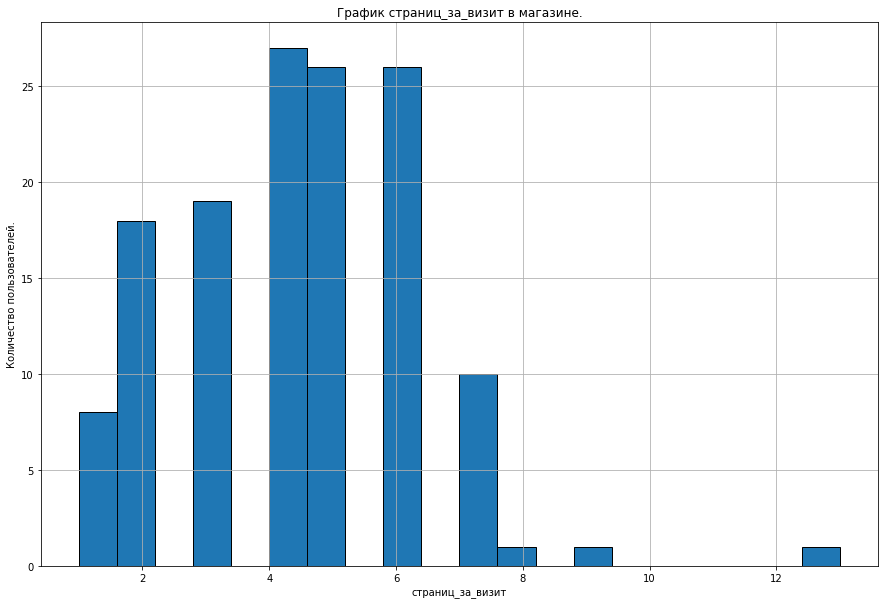

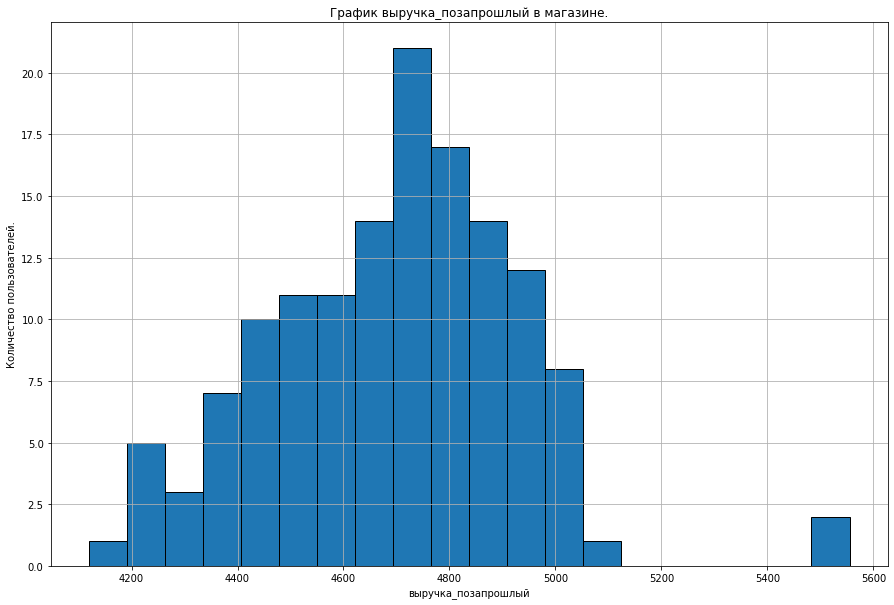

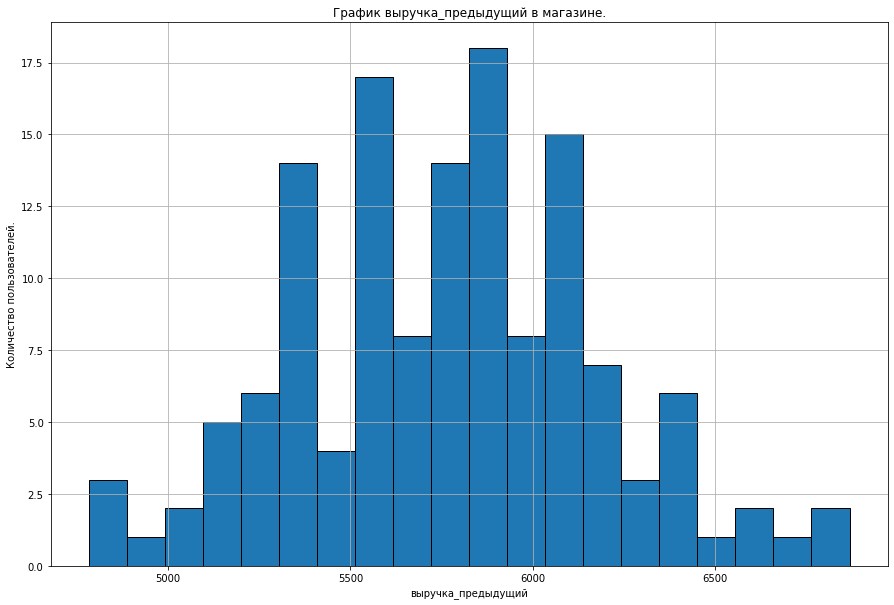

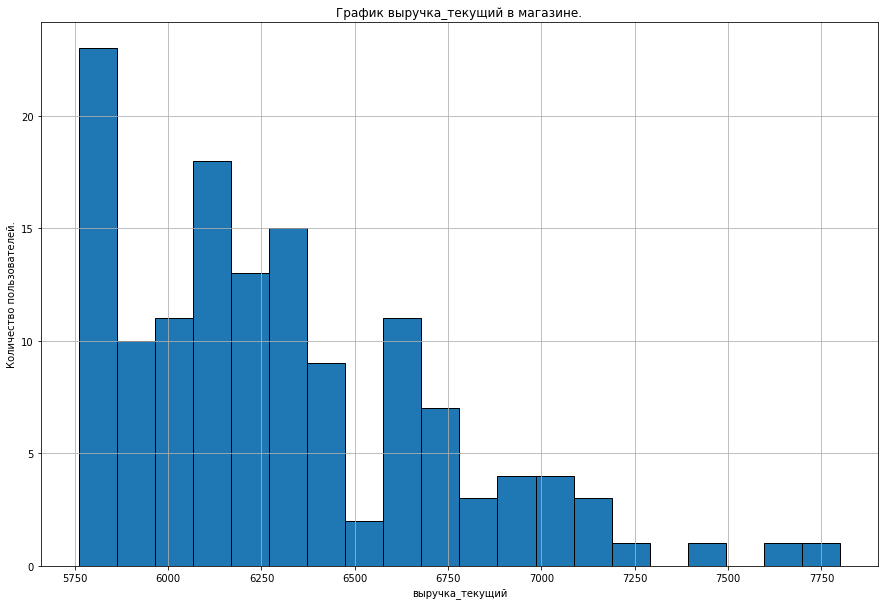

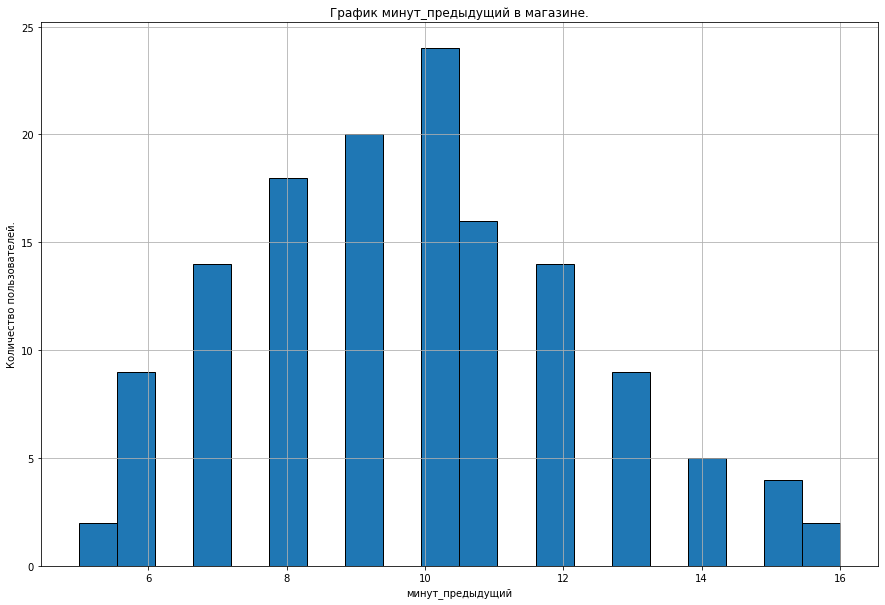

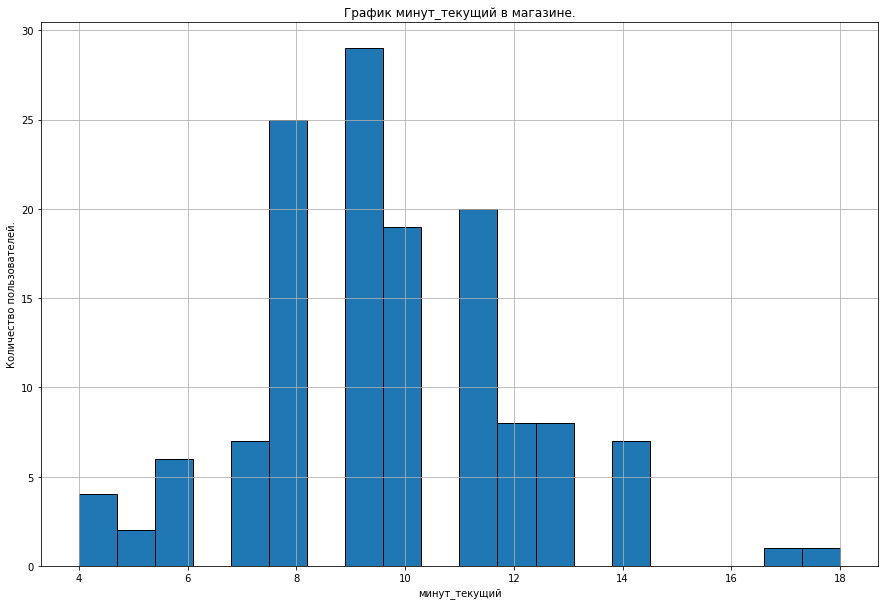

In [91]:
for i in red_users_list:
    red_users[i].plot.hist(bins=20, figsize=(15, 10), grid=True, ec='black');
    plt.xlabel(i)
    plt.ylabel('Количество пользователей.')
    plt.title(f'График {i} в магазине.')
    plt.show()

Выделив необходимую группу клиентов, я построил графики по некоторым признакам.

На графике маркет актив 6 мес видно, что на большую часть клиентов из исследумой группы приходилось 3-4 маркетинговые коммуникации за последние полгода. Самое большое количество клиентов из этой выборки было зарегистрировано около 800 дней назад.
Можно заметить, что клиенты из исследумого сегмента либо не сильно обращают внимание на акции (0.4 акционных покупок), либо покупают только акционные товары (0.9 и более акционных покупок, но таких меньше). Средний просмотр категорий за визит показывает, что чаще всего такие пользователи смотрят по 2 категории. Количество неоплаченных продуктов у этих людей чаще всего от 2 до 6. График ошибок показал, что чаще всего на одного пользователя приходится 3-4 ошибок. Пользователи чаще всего просматривают около 4-6 страниц за визит. Графики выручка за позапрошлый, предыдущий и текущий месяцы позволяют понять, что за этот период выручка, которая чаще всего приходилась на одного клиента увеличилась с позапрошлого на предыдущий и осталась неизменной с предыдущего на текущий. Время на сайте за последнее время поменялось незначительно.

In [92]:
red_users_obj_list = get_obj_names(red_users)

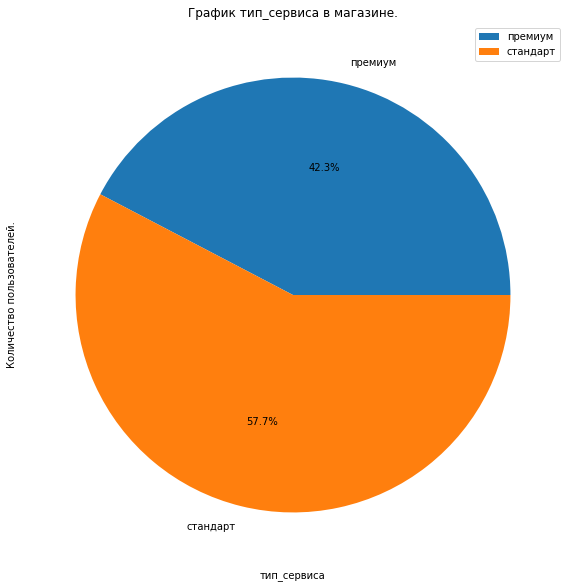

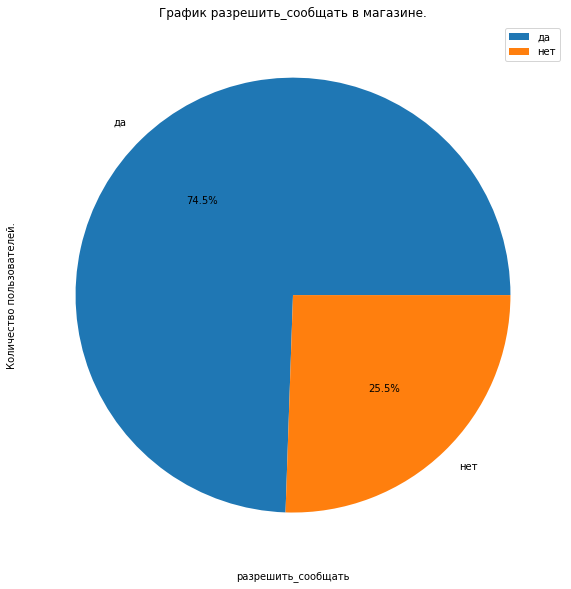

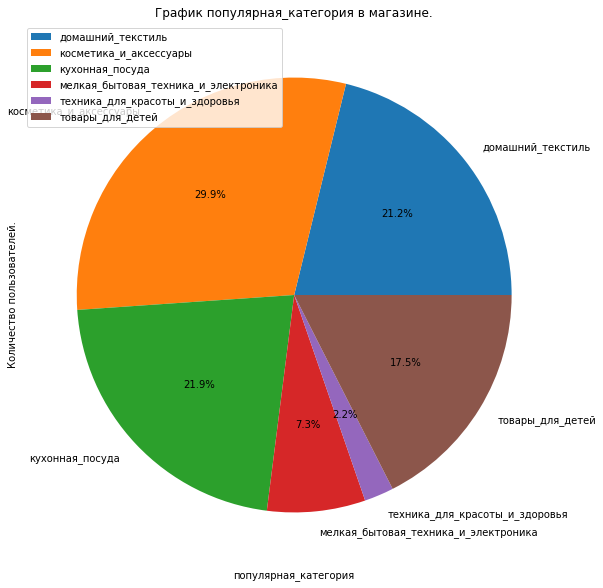

In [93]:
for i in red_users_obj_list:
    red_users.pivot_table(index=i, values='id', aggfunc='count').plot.pie(
        figsize=(15, 10), grid=True, subplots=True, autopct='%1.1f%%');
    plt.xlabel(i)
    plt.ylabel('Количество пользователей.')
    plt.title(f'График {i} в магазине.')
    plt.show()

График категориальных признаков показал, что 57.7% пользователей исследуемой выборки не имеют премиумного типа сервиса. 74.5% покупателей согласны на маркетинговые предложения. Любимой категорией товаров людей из исследуемой группы является косметика и аксессуары, а также с небольшим отрывом кухонная посуда и домашний текстиль.

***Рекомендации***

На основе проведенного анализа группы покупателей с большой вероятностью ухода и высокой выручкой я могу дать следующие рекомендации:

- Использовать данные о самой популярной категории, чтобы предлагать товары и акции в этой ней.

- Учитывая, что большая часть пользователей согласны на рассылку, регулярно отправлять персонализированные подборки товаров и акционные предложения.

- Продвигать премиум-сервис с дополнительными привилегиями (например, быстрее доставка, доступ к эксклюзивным предложениям).

- Сделать систему лояльности, где покупки без скидок увеличивают накопление бонусов.

- Внедрить уведомления-напоминания о неоплаченных продуктах.

- Увеличить частоту полезных рассылок.

***Вывод***

Для исследования я взял группу пользователей, чья вероятность принадлежать к классу людей, чья активность не снизилась <= 0.3, а выручка находится в третьем квантиле.

В исследуемой группе клиентов большинство получало 3-4 маркетинговые коммуникации за последние полгода. Наибольшее количество клиентов зарегистрировано около 800 дней назад. Клиенты либо мало реагируют на акции (0.4 акционных покупок), либо активно приобретают только акционные товары (0.9 и более акционных покупок). Средний просмотр категорий за визит составляет 2, а количество неоплаченных продуктов варьируется от 2 до 6. На одного пользователя в среднем приходится 3-4 ошибки и 4-6 страниц за визит. Выручка на клиента увеличилась с позапрошлого месяца на предыдущий, затем осталась стабильной. Время, проведенное на сайте, изменилось несущественно.

График категориальных признаков показал, что 57.7% пользователей исследуемой выборки не имеют премиумного типа сервиса. 74.5% покупателей согласны на маркетинговые предложения. Любимой категорией товаров людей из исследуемой группы является косметика и аксессуары, а также с небольшим отрывом кухонная посуда и домашний текстиль.

На основе проведенного анализа группы покупателей с большой вероятностью ухода и высокой выручкой я могу дать следующие рекомендации:

- Использовать данные о самой популярной категории, чтобы предлагать товары и акции в этой ней.

- Учитывая, что большая часть пользователей согласны на рассылку, регулярно отправлять персонализированные подборки товаров и акционные предложения.

- Продвигать премиум-сервис с дополнительными привилегиями (например, быстрее доставка, доступ к эксклюзивным предложениям).

- Сделать систему лояльности, где покупки без скидок увеличивают накопление бонусов.

- Внедрить уведомления-напоминания о неоплаченных продуктах.

- Увеличить частоту полезных рассылок.

## Общий вывод

***Задача***

Интернет-магазин продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. 

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

***Исходные данные***

Исходные данные представляли собой 4 датасета:

- market_file.csv
    - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- market_money.csv
    - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- market_time.csv
    - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- money.csv
    - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

В каждом из этих датасетов я провел поиск пропущенных значений, дубликатов, а также провел работу с названиями и содержанием столбцов и их типами данных.

***Поиск лучшей модели и что получилось***

Перед поиском лучшей модели я провел исследовательский и корреляционный анализ данных, после чего рассортировал признаки по следующим спискам, потом составил нужные пайплайны и словарь с гиперпараметрами модели. Модель была найдена с помощью RandomizedSearchCV - это инструмент подбора гиперпараметров. Лучшей моделью оказалась SVC с полиномиальным ядром, а также degree=2 и С=1.

С помощью анализа SHAP-значений модели заказчик получил следующие рекомендации для моделирования и принятия бизнес-решений:

Можно посоветовать заказчику собирать больше данных об активности, отталкиваться от нее в принятии бизнес-решений, а также можно добавить новые признаки, например частоту возвращения на сайт. Эти новые признаки могут помочь более точно оценивать поведение пользователей и выявлять закономерности, которые улучшают пользовательский опыт.

Кроме того, имеет смысл рассмотреть возможность сбора данных о взаимодействии с рекламными материалами, такими как клики на баннеры или переходы по ссылкам в email-рассылках. Эти данные могут дать ценную информацию о том, как реклама влияет на посещаемость и поведение пользователей в интернет-магазине.

Также полезно внедрить систему отслеживания завершенности покупок, чтобы анализировать не только количество визитов, но и их конечные результаты. Систематизация таких данных позволит лучше понять, на каких стадиях пользователи теряют интерес и как это можно исправить.

Отслеживание поведения пользователя со временем может привести к созданию более персонализированных маркетинговых стратегий и предложений, которые могут существенно повысить уровень удовлетворенности покупателей и поспособствовать удержанию постоянных клиентов.

Все вышеперечисленное даст возможность еще точнее оценить поведение пользователей для персонализации предложений.

***Выбранный сегмент пользователей***

Для исследования я взял группу пользователей, чья вероятность принадлежать к классу людей, чья активность не снизилась <= 0.3, а выручка находится в третьем квантиле.

В исследуемой группе клиентов большинство получало 3-4 маркетинговые коммуникации за последние полгода. Наибольшее количество клиентов зарегистрировано около 800 дней назад. Клиенты либо мало реагируют на акции (0.4 акционных покупок), либо активно приобретают только акционные товары (0.9 и более акционных покупок). Средний просмотр категорий за визит составляет 2, а количество неоплаченных продуктов варьируется от 2 до 6. На одного пользователя в среднем приходится 3-4 ошибки и 4-6 страниц за визит. Выручка на клиента увеличилась с позапрошлого месяца на предыдущий, затем осталась стабильной. Время, проведенное на сайте, изменилось несущественно.

График категориальных признаков показал, что 57.7% пользователей исследуемой выборки не имеют премиумного типа сервиса. 74.5% покупателей согласны на маркетинговые предложения. Любимой категорией товаров людей из исследуемой группы является косметика и аксессуары, а также с небольшим отрывом кухонная посуда и домашний текстиль.

На основе проведенного анализа группы покупателей с большой вероятностью ухода и высокой выручкой я могу дать следующие рекомендации:

- Использовать данные о самой популярной категории, чтобы предлагать товары и акции в этой ней.

- Учитывая, что большая часть пользователей согласны на рассылку, регулярно отправлять персонализированные подборки товаров и акционные предложения.

- Продвигать премиум-сервис с дополнительными привилегиями (например, быстрее доставка, доступ к эксклюзивным предложениям).

- Сделать систему лояльности, где покупки без скидок увеличивают накопление бонусов.

- Внедрить уведомления-напоминания о неоплаченных продуктах.

- Увеличить частоту полезных рассылок.